In [2]:
import pandas as pd
import numpy as np

In [3]:
# Read the Excel file into a DataFrame
cwa = pd.read_excel('CwA Final Data.xlsx', sheet_name = 'CwA')

In [4]:
# Assuming 'treat' column is present in DataFrame cwa
countries_with_treat_value_1 = cwa[cwa['treat'] == 1]['Country'].unique()
countries_string = ', '.join(countries_with_treat_value_1)

# Printing the concatenated string
print(countries_string)


Benin, Burkina Faso, Cote d'Ivoire, Ethiopia, Ghana, Guinea, Rwanda, Senegal, Togo, Egypt, Arab Rep., Morocco, Tunisia


In [5]:
# List of country names
cwa_countries = ['Benin', 'Burkina Faso', "Cote d'Ivoire", 'Ethiopia', 'Ghana', 'Guinea', 'Rwanda', 'Senegal', 'Togo', 'Egypt, Arab Rep.', 'Morocco', 'Tunisia']

# Create a new column 'CwACountries' and set it to True if the country is in the specified list, otherwise False
cwa['CwACountries'] = cwa['Country'].isin(cwa_countries)

# Convert the boolean values to integers (0 and 1) to represent dummy variable
cwa['CwACountries'] = cwa['CwACountries'].astype(int)

# Display the DataFrame
print(cwa)


     id  Year  Country       Pop    TradeGDP  PolStability  GDPGrowth  \
0     1  2010   Angola  23364185  104.123648     -0.226182   4.398376   
1     1  2011   Angola  24259111   99.982506     -0.369238   3.472053   
2     1  2012   Angola  25188292   91.800097     -0.389323   8.542107   
3     1  2013   Angola  26147002   86.811933     -0.391233   4.954613   
4     1  2014   Angola  27128337   79.332923     -0.333232   4.822559   
..   ..   ...      ...       ...         ...           ...        ...   
541  48  2018  Tunisia  11933041  103.871824     -0.868882   2.624828   
542  48  2019  Tunisia  12049314  102.332615     -0.869923   1.588013   
543  48  2020  Tunisia  12161723   84.240772     -0.580146  -8.817879   
544  48  2021  Tunisia  12262946   94.352173     -0.695751   4.405362   
545  48  2022  Tunisia  12356117  107.395468      0.000000   2.521761   

        FDIInflow    FDIGDP  Inflation  ...    GDPperCap  UrbanPopT  treat  \
0   -3.227211e+09 -3.950098  14.469656  ...  

In [6]:
# Assuming cwa is your DataFrame
cwa['CovidDummy'] = cwa['Year'].apply(lambda x: 1 if x in [2021, 2022] else 0)

In [ ]:
Mean Imputation for missing values

In [7]:
# Define the list of columns to retain and apply mean imputation
columns_to_retain = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

columns_to_impute = ['Pop', 'TradeGDP', 'PolStability', 'GDPGrowth', 'FDIInflow', 'FDIGDP', 'Inflation', 'ExchangeRate', 
                           'ElectAccess', 'GDPpCurrent', 'NetODA', 'NetODAGDP',  
                          'GovtExpd', 'GCapForm', 'GDPDeflator', 'GDPpConstant', 'GDPGrowthn', 'GDSavings', 'ConsumerPrices', 
                            'Inflation consumer prices annual percent', 
                          'Total Employed_millions', 'Invest nada', 'NatRent', 'Control of corruption', 
                          'Political Stability and Absence of violence or terrorism', 'Regulatory Quality', 'Rule of Law', 
                          'Voice and accountability', 'Gross capital formation percent of GDP',  
                          'trade percent of gdp', 'exports current usd', 'imports current usd', 'Employment-thousands-15', 
                          'Employment-thousands-25', 'Employment-to-population ratio-25', 'Employment-to-population ratio-15', 'Unem-25', 
                     'NetTrade', 'NGrossCap', 'GDPperCap', 'UrbanPopT', 'Government Effectiveness']

# Create a new DataFrame with selected columns from cwa_final
cwa_imp = cwa[columns_to_retain].copy()

# Replace zeros (0) with NaN in the specified columns
cwa[columns_to_impute] = cwa[columns_to_impute].replace(0, np.nan)

# Group by 'Country' and impute missing values with mean of each column within each country group
cwa_imp[columns_to_impute] = cwa.groupby('Country')[columns_to_impute].transform(lambda x: x.fillna(x.mean()))

print(cwa_imp)


     id  Year  Country  treat  CwACountries  CovidDummy       Pop    TradeGDP  \
0     1  2010   Angola      0             0           0  23364185  104.123648   
1     1  2011   Angola      0             0           0  24259111   99.982506   
2     1  2012   Angola      0             0           0  25188292   91.800097   
3     1  2013   Angola      0             0           0  26147002   86.811933   
4     1  2014   Angola      0             0           0  27128337   79.332923   
..   ..   ...      ...    ...           ...         ...       ...         ...   
541  48  2018  Tunisia      1             1           0  11933041  103.871824   
542  48  2019  Tunisia      1             1           0  12049314  102.332615   
543  48  2020  Tunisia      1             1           0  12161723   84.240772   
544  48  2021  Tunisia      1             1           1  12262946   94.352173   
545  48  2022  Tunisia      1             1           1  12356117  107.395468   

     PolStability  GDPGrowt

# Descriptive Stats

In [8]:
selected_columns = ['TradeGDP', 'PolStability', 'GDPGrowth', 'FDIInflow', 'FDIGDP', 'ExchangeRate', 'ElectAccess', 'GDPpCurrent', 'NetODA', 
                    'NetODAGDP', 'GovtExpd', 'GCapForm', 'GDPDeflator', 'GDPpConstant', 'GDPGrowthn', 'GDSavings', 'ConsumerPrices', 
                    'Inflation consumer prices annual percent', 'Invest nada', 'NatRent', 'Control of corruption', 
                    'Political Stability and Absence of violence or terrorism', 'Regulatory Quality', 'Rule of Law', 'Voice and accountability', 
                    'Gross capital formation percent of GDP', 'trade percent of gdp', 'exports current usd', 'imports current usd', 
                    'Employment-thousands-25', 'Employment-to-population ratio-25', 'Employment-to-population ratio-15', 'Unem-25', 'NetTrade', 'NGrossCap', 'GDPperCap', 
                    'UrbanPopT', 'CovidDummy', 'CwACountries']

# Select only the columns specified in selected_columns
cwa_selected = cwa_imp[selected_columns]

# Descriptive statistics for the overall DataFrame
cwa_descriptive_stats = cwa_selected.describe().T.reset_index()

# Printing the descriptive statistics
print("Descriptive statistics for the overall DataFrame:")
print(cwa_descriptive_stats)


Descriptive statistics for the overall DataFrame:
                                                index  count          mean  \
0                                            TradeGDP  546.0  6.731340e+01   
1                                        PolStability  546.0 -5.668278e-01   
2                                           GDPGrowth  546.0  3.623430e+00   
3                                           FDIInflow  546.0  1.071212e+09   
4                                              FDIGDP  546.0  3.821453e+00   
5                                        ExchangeRate  546.0  6.728952e+02   
6                                         ElectAccess  546.0  4.951487e+01   
7                                         GDPpCurrent  546.0  2.574652e+03   
8                                              NetODA  546.0  1.030216e+09   
9                                           NetODAGDP  546.0  5.688325e+00   
10                                           GovtExpd  546.0  1.490903e+01   
11            

# Percentage of missing values per variable

In [9]:
# Select only the columns specified in selected_columns
cwa_selected = cwa[selected_columns]

# Calculate percentage of missing values for each variable
missing_percentages = cwa_selected.isnull().mean() * 100

# Create a DataFrame to display results
missing_df = pd.DataFrame({
    'Variable': missing_percentages.index,
    'Missing Percentage': missing_percentages.values
})

# Display the results
print("Percentage of missing values in each variable:")
print(missing_df)


Percentage of missing values in each variable:
                                             Variable  Missing Percentage
0                                            TradeGDP            2.197802
1                                        PolStability            7.692308
2                                           GDPGrowth            0.000000
3                                           FDIInflow            5.860806
4                                              FDIGDP            5.860806
5                                        ExchangeRate            0.915751
6                                         ElectAccess            7.692308
7                                         GDPpCurrent            0.000000
8                                              NetODA            7.692308
9                                           NetODAGDP            7.692308
10                                           GovtExpd            3.846154
11                                           GCapForm            

In [10]:
# Count the number of missing rows in each column
missing_counts = cwa_imp.isnull().sum()

# Display the result
print(missing_counts)

id                                                          0
Year                                                        0
Country                                                     0
treat                                                       0
CwACountries                                                0
CovidDummy                                                  0
Pop                                                         0
TradeGDP                                                    0
PolStability                                                0
GDPGrowth                                                   0
FDIInflow                                                   0
FDIGDP                                                      0
Inflation                                                   0
ExchangeRate                                                0
ElectAccess                                                 0
GDPpCurrent                                                 0
NetODA  

In [11]:
# Count the number of rows with zero in each column
zero_counts = (cwa_imp == 0).sum()

# Display the result
print(zero_counts)


id                                                            0
Year                                                          0
Country                                                       0
treat                                                       474
CwACountries                                                390
CovidDummy                                                  462
Pop                                                           0
TradeGDP                                                      0
PolStability                                                  0
GDPGrowth                                                     0
FDIInflow                                                     0
FDIGDP                                                        0
Inflation                                                     0
ExchangeRate                                                  0
ElectAccess                                                   0
GDPpCurrent                             

In [12]:
# Get the data type of each column
data_types = cwa_imp.dtypes

# Combine the counts and data types into a single DataFrame
result = pd.DataFrame({'Zero Counts': zero_counts, 'Data Type': data_types})

# Display the result
print(result)

                                                    Zero Counts Data Type
id                                                            0     int64
Year                                                          0     int64
Country                                                       0    object
treat                                                       474     int64
CwACountries                                                390     int64
CovidDummy                                                  462     int64
Pop                                                           0     int64
TradeGDP                                                      0   float64
PolStability                                                  0   float64
GDPGrowth                                                     0   float64
FDIInflow                                                     0   float64
FDIGDP                                                        0   float64
Inflation                             

# Choosing control group

# Propensity Score Matching

PSM for FDI

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Copy the original DataFrame
cwa_b = cwa_imp.copy()

# List of covariates
control_vars = [
    'exports current usd', 'trade percent of gdp', 'imports current usd', 
    'Employment-to-population ratio-15', 'GDPpConstant', 'GDSavings', 'NatRent', 
    'GDPGrowth', 'Control of corruption', 'Inflation consumer prices annual percent', 
    'NetODA', 'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
    'Political Stability and Absence of violence or terrorism', 'GDPperCap', 'CovidDummy'
]

# Define outcome, treatment, and covariates
y = cwa_b['FDIInflow']
T = cwa_b['CwACountries']
X = cwa_b[control_vars]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data = cwa_b[cwa_b['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data[control_vars], pre_treatment_data[T.name])
propensity_scores_pre_treatment = logit.predict_proba(pre_treatment_data[control_vars])[:, 1]

# Add propensity scores to the pre-treatment DataFrame
pre_treatment_data['propensity_score_fdi'] = propensity_scores_pre_treatment

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_b[control_vars])[:, 1]

# Add propensity scores to the original DataFrame
cwa_b['propensity_score_fdi'] = propensity_scores_all

# Calculate the average propensity score per country
average_propensity_score_per_country = cwa_b.groupby('id')['propensity_score_fdi'].mean().reset_index()

# Define the list of treated countries and the list of IDs to exclude from neighbors
treated_countries = cwa_b[cwa_b['CwACountries'] == 1]['id'].unique()
excluded_ids = set(treated_countries)

# Use nearest neighbors to find the countries with the closest average propensity scores
nbrs = NearestNeighbors(n_neighbors=len(average_propensity_score_per_country), algorithm='ball_tree').fit(average_propensity_score_per_country[['propensity_score_fdi']])
distances, indices = nbrs.kneighbors(average_propensity_score_per_country[['propensity_score_fdi']])

# Add the neighbor indices to the DataFrame
average_propensity_score_per_country['neighbor_indices'] = list(indices)

# Get the IDs of the closest countries for each treated country, ensuring uniqueness
used_neighbors = set()
closest_countries = []
for country_id in treated_countries:
    country_index = average_propensity_score_per_country[average_propensity_score_per_country['id'] == country_id].index[0]
    neighbor_indices = average_propensity_score_per_country.loc[country_index, 'neighbor_indices']
    closest_neighbor = next(
        (average_propensity_score_per_country.loc[idx, 'id'] for idx in neighbor_indices 
         if average_propensity_score_per_country.loc[idx, 'id'] not in excluded_ids and 
         average_propensity_score_per_country.loc[idx, 'id'] != country_id and 
         average_propensity_score_per_country.loc[idx, 'id'] not in used_neighbors), 
        None
    )
    if closest_neighbor:
        closest_countries.append((country_id, closest_neighbor))
        used_neighbors.add(closest_neighbor)

# Convert the result to a DataFrame
closest_countries_df = pd.DataFrame(closest_countries, columns=['id', 'closest_country'])

# Make the new dataframes accessible
print(closest_countries_df)


    id  closest_country
0    2               27
1    4                7
2   13               29
3   18               43
4   21               33
5   22               41
6   37               35
7   39               50
8   47               12
9   14               36
10  32               45
11  48                1


PSM for invest nada

In [14]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Copy the original DataFrame
cwa_b1 = cwa_imp.copy()

# List of covariates
control_vars = [
    'exports current usd', 'trade percent of gdp', 'imports current usd', 
    'Employment-to-population ratio-15', 'GDPpConstant', 'GDSavings', 'NatRent', 
    'GDPGrowth', 'Control of corruption', 'Inflation consumer prices annual percent', 
    'NetODA', 'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
    'Political Stability and Absence of violence or terrorism', 'GDPperCap', 'CovidDummy'
]

# Define outcome, treatment, and covariates
y = cwa_b1['Invest nada']
T = cwa_b1['CwACountries']
X = cwa_b1[control_vars]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data_nada = cwa_b1[cwa_b1['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data_nada['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data_nada[control_vars], pre_treatment_data_nada[T.name])
propensity_scores = logit.predict_proba(pre_treatment_data_nada[control_vars])[:, 1]

# Add propensity scores to the DataFrame
pre_treatment_data_nada['propensity_score'] = propensity_scores

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_b1[control_vars])[:, 1]

# Add propensity scores to the original DataFrame
cwa_b1['propensity_score'] = propensity_scores_all

# Calculate the average propensity score per country
average_propensity_score_per_country = cwa_b1.groupby('id')['propensity_score'].mean().reset_index()

# Define the list of treated countries and the list of IDs to exclude from neighbors
treated_countries = cwa_b1[cwa_b1['CwACountries'] == 1]['id'].unique()
excluded_ids = set(treated_countries)

# Use nearest neighbors to find the countries with the closest average propensity scores
nbrs = NearestNeighbors(n_neighbors=len(average_propensity_score_per_country), algorithm='ball_tree').fit(average_propensity_score_per_country[['propensity_score']])
distances, indices = nbrs.kneighbors(average_propensity_score_per_country[['propensity_score']])

# Add the neighbor indices to the DataFrame
average_propensity_score_per_country['neighbor_indices'] = list(indices)

# Get the IDs of the closest countries for each treated country, ensuring uniqueness
used_neighbors = set()
closest_countries = []
for country_id in treated_countries:
    country_index = average_propensity_score_per_country[average_propensity_score_per_country['id'] == country_id].index[0]
    neighbor_indices = average_propensity_score_per_country.loc[country_index, 'neighbor_indices']
    closest_neighbor = next(
        (average_propensity_score_per_country.loc[idx, 'id'] for idx in neighbor_indices 
         if average_propensity_score_per_country.loc[idx, 'id'] not in excluded_ids and 
         average_propensity_score_per_country.loc[idx, 'id'] != country_id and 
         average_propensity_score_per_country.loc[idx, 'id'] not in used_neighbors), 
        None
    )
    if closest_neighbor:
        closest_countries.append((country_id, closest_neighbor))
        used_neighbors.add(closest_neighbor)

# Convert the result to a DataFrame
closest_countries_nada = pd.DataFrame(closest_countries, columns=['id', 'closest_country'])

# Make the new dataframes accessible
print(closest_countries_nada)


    id  closest_country
0    2               27
1    4                7
2   13               29
3   18               43
4   21               33
5   22               41
6   37               35
7   39               50
8   47               12
9   14               36
10  32               45
11  48                1


PSM for Gross Cap Formation

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Copy the original DataFrame
cwa_c = cwa_imp.copy()

# Define outcome, treatment, and covariates
y = cwa_c['GCapForm']
T = cwa_c['CwACountries']
X = cwa_c[['trade percent of gdp', 'GDSavings', 'GDPGrowth', 'NatRent', 'UrbanPopT', 
           'GDPDeflator', 'NetTrade', 'Inflation consumer prices annual percent', 
           'ConsumerPrices', 'Political Stability and Absence of violence or terrorism', 
           'Government Effectiveness', 'Rule of Law', 'Pop', 
           'Employment-to-population ratio-15', 'Invest nada', 
           'GDPperCap', 'FDIInflow', 'CovidDummy']]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data_gcap = cwa_c[cwa_c['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data_gcap['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data_gcap[X.columns], pre_treatment_data_gcap[T.name])
propensity_scores = logit.predict_proba(pre_treatment_data_gcap[X.columns])[:, 1]

# Add propensity scores to the DataFrame
pre_treatment_data_gcap['propensity_score'] = propensity_scores

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_c[X.columns])[:, 1]

# Add propensity scores to the original DataFrame
cwa_c['propensity_score'] = propensity_scores_all

# Calculate the average propensity score per country
average_propensity_score_per_country = cwa_c.groupby('id')['propensity_score'].mean().reset_index()

# Define the list of treated countries and the list of IDs to exclude from neighbors
treated_countries = cwa_c[cwa_c['CwACountries'] == 1]['id'].unique()
excluded_ids = set(treated_countries)

# Use nearest neighbors to find the countries with the closest average propensity scores
nbrs = NearestNeighbors(n_neighbors=len(average_propensity_score_per_country), algorithm='ball_tree').fit(average_propensity_score_per_country[['propensity_score']])
distances, indices = nbrs.kneighbors(average_propensity_score_per_country[['propensity_score']])

# Add the neighbor indices to the DataFrame
average_propensity_score_per_country['neighbor_indices'] = list(indices)

# Get the IDs of the closest countries for each treated country, ensuring uniqueness
used_neighbors = set()
closest_countries = []
for country_id in treated_countries:
    country_index = average_propensity_score_per_country[average_propensity_score_per_country['id'] == country_id].index[0]
    neighbor_indices = average_propensity_score_per_country.loc[country_index, 'neighbor_indices']
    closest_neighbor = next(
        (average_propensity_score_per_country.loc[idx, 'id'] for idx in neighbor_indices 
         if average_propensity_score_per_country.loc[idx, 'id'] not in excluded_ids and 
         average_propensity_score_per_country.loc[idx, 'id'] != country_id and 
         average_propensity_score_per_country.loc[idx, 'id'] not in used_neighbors), 
        None
    )
    if closest_neighbor:
        closest_countries.append((country_id, closest_neighbor))
        used_neighbors.add(closest_neighbor)

# Convert the result to a DataFrame
closest_countries_gcap = pd.DataFrame(closest_countries, columns=['id', 'closest_country'])

# Make the new dataframes accessible
print(closest_countries_gcap)


    id  closest_country
0    2               41
1    4                9
2   13               27
3   18               43
4   21               46
5   22               19
6   37               30
7   39               29
8   47               34
9   14               36
10  32               33
11  48               12


PSM for Employment

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Copy the original DataFrame
cwa_d = cwa_imp.copy()

# Define outcome, treatment, and covariates
y = cwa_d['Employment-to-population ratio-15']
T = cwa_d['CwACountries']
X = cwa_d[['Inflation consumer prices annual percent', 'GDPperCap', 'Political Stability and Absence of violence or terrorism', 
           'ExchangeRate', 'Pop', 'Government Effectiveness', 'UrbanPopT', 
           'ElectAccess', 'GovtExpd', 'Rule of Law', 'NatRent', 'Invest nada', 'GDPpConstant', 'GDPGrowth', 
           'Control of corruption', 'exports current usd', 'imports current usd', 'trade percent of gdp', 'FDIInflow', 'CovidDummy']]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data_emp = cwa_d[cwa_d['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data_emp['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data_emp[X.columns], pre_treatment_data_emp[T.name])
propensity_scores = logit.predict_proba(pre_treatment_data_emp[X.columns])[:, 1]

# Add propensity scores to the DataFrame
pre_treatment_data_emp['propensity_score_emp'] = propensity_scores

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_d[X.columns])[:, 1]

# Add propensity scores to the original DataFrame
cwa_d['propensity_score_emp'] = propensity_scores_all

# Calculate the average propensity score per country
average_propensity_score_per_country_emp = cwa_d.groupby('id')['propensity_score_emp'].mean().reset_index()

# Define the list of treated countries and the list of IDs to exclude from neighbors
treated_countries_emp = cwa_d[cwa_d['CwACountries'] == 1]['id'].unique()
excluded_ids = set(treated_countries_emp)

# Use nearest neighbors to find the countries with the closest average propensity scores
nbrs = NearestNeighbors(n_neighbors=len(average_propensity_score_per_country_emp), algorithm='ball_tree').fit(average_propensity_score_per_country_emp[['propensity_score_emp']])
distances, indices = nbrs.kneighbors(average_propensity_score_per_country_emp[['propensity_score_emp']])

# Add the neighbor indices to the DataFrame
average_propensity_score_per_country_emp['neighbor_indices'] = list(indices)

# Get the IDs of the closest countries for each treated country, ensuring uniqueness
used_neighbors = set()
closest_countries_emp = []
for country_id in treated_countries_emp:
    country_index = average_propensity_score_per_country_emp[average_propensity_score_per_country_emp['id'] == country_id].index[0]
    neighbor_indices = average_propensity_score_per_country_emp.loc[country_index, 'neighbor_indices']
    closest_neighbor = next(
        (average_propensity_score_per_country_emp.loc[idx, 'id'] for idx in neighbor_indices 
         if average_propensity_score_per_country_emp.loc[idx, 'id'] not in excluded_ids and 
         average_propensity_score_per_country_emp.loc[idx, 'id'] != country_id and 
         average_propensity_score_per_country_emp.loc[idx, 'id'] not in used_neighbors), 
        None
    )
    if closest_neighbor:
        closest_countries_emp.append((country_id, closest_neighbor))
        used_neighbors.add(closest_neighbor)

# Convert the result to a DataFrame
closest_countries_emp_df = pd.DataFrame(closest_countries_emp, columns=['id', 'closest_country'])

# Make the new dataframes accessible
print(closest_countries_emp_df)


    id  closest_country
0    2               41
1    4                9
2   13               50
3   18               11
4   21               46
5   22               19
6   37               30
7   39               29
8   47               15
9   14               43
10  32               24
11  48                5


PSM for GDP per capital

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Copy the original DataFrame
cwa_e = cwa_imp.copy()

# Define outcome, treatment, and covariates
y = cwa_e['GDPperCap']
T = cwa_e['CwACountries']
X = cwa_e[['ElectAccess', 'Voice and accountability', 'NatRent', 'Pop', 'exports current usd', 'UrbanPopT', 
           'GDSavings', 'imports current usd', 'NetODA', 'ExchangeRate', 'Employment-to-population ratio-15', 
           'Regulatory Quality', 'trade percent of gdp', 'GovtExpd', 'GCapForm', 
           'Inflation consumer prices annual percent', 'Rule of Law', 
           'Government Effectiveness', 'Political Stability and Absence of violence or terrorism', 
           'Control of corruption', 'GDPGrowth', 'FDIInflow', 'CovidDummy']]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data_gdp = cwa_e[cwa_e['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data_gdp['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data_gdp[X.columns], pre_treatment_data_gdp[T.name])
propensity_scores = logit.predict_proba(pre_treatment_data_gdp[X.columns])[:, 1]

# Add propensity scores to the DataFrame
pre_treatment_data_gdp['propensity_score_gdp'] = propensity_scores

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_e[X.columns])[:, 1]

# Add propensity scores to the original DataFrame
cwa_e['propensity_score_gdp'] = propensity_scores_all

# Calculate the average propensity score per country
average_propensity_score_per_country_gdp = cwa_e.groupby('id')['propensity_score_gdp'].mean().reset_index()

# Define the list of treated countries and the list of IDs to exclude from neighbors
treated_countries_gdp = cwa_e[cwa_e['CwACountries'] == 1]['id'].unique()
excluded_ids = set(treated_countries_gdp)

# Use nearest neighbors to find the countries with the closest average propensity scores
nbrs = NearestNeighbors(n_neighbors=len(average_propensity_score_per_country_gdp), algorithm='ball_tree').fit(average_propensity_score_per_country_gdp[['propensity_score_gdp']])
distances, indices = nbrs.kneighbors(average_propensity_score_per_country_gdp[['propensity_score_gdp']])

# Add the neighbor indices to the DataFrame
average_propensity_score_per_country_gdp['neighbor_indices'] = list(indices)

# Get the IDs of the closest countries for each treated country, ensuring uniqueness
used_neighbors = set()
closest_countries_gdp = []
for country_id in treated_countries_gdp:
    country_index = average_propensity_score_per_country_gdp[average_propensity_score_per_country_gdp['id'] == country_id].index[0]
    neighbor_indices = average_propensity_score_per_country_gdp.loc[country_index, 'neighbor_indices']
    closest_neighbor = next(
        (average_propensity_score_per_country_gdp.loc[idx, 'id'] for idx in neighbor_indices 
         if average_propensity_score_per_country_gdp.loc[idx, 'id'] not in excluded_ids and 
         average_propensity_score_per_country_gdp.loc[idx, 'id'] != country_id and 
         average_propensity_score_per_country_gdp.loc[idx, 'id'] not in used_neighbors), 
        None
    )
    if closest_neighbor:
        closest_countries_gdp.append((country_id, closest_neighbor))
        used_neighbors.add(closest_neighbor)

# Convert the result to a DataFrame
closest_countries_gdp_df = pd.DataFrame(closest_countries_gdp, columns=['id', 'closest_country'])

# Make the new dataframes accessible
print(closest_countries_gdp_df)


    id  closest_country
0    2               41
1    4                9
2   13               27
3   18               43
4   21               46
5   22               19
6   37               30
7   39               29
8   47               34
9   14               36
10  32               33
11  48               12


PSM for Export

In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Copy the original DataFrame
cwa_f = cwa_imp.copy()

# Define outcome, treatment, and covariates
y = cwa_f['exports current usd']
T = cwa_f['CwACountries']
X = cwa_f[['GDPpConstant', 'FDIInflow', 'trade percent of gdp', 'UrbanPopT', 'GDPperCap', 'GDSavings', 
           'ConsumerPrices', 'ElectAccess', 'NatRent', 'FDIGDP', 'GDPGrowth', 
           'ExchangeRate', 'Voice and accountability', 'Inflation consumer prices annual percent', 
           'Employment-to-population ratio-15', 'Control of corruption', 'Regulatory Quality', 
           'Political Stability and Absence of violence or terrorism', 'GovtExpd', 'Rule of Law', 
           'CovidDummy']]

# Filter data to the pre-treatment period (e.g., before 2017)
pre_treatment_data_expt = cwa_f[cwa_f['Year'] <= 2016].copy()

# Ensure pre_treatment_data contains both classes
if pre_treatment_data_expt['CwACountries'].nunique() == 1:
    raise ValueError("Pre-treatment data contains only one class, please check the data.")

# Calculate Propensity Scores for the pre-treatment period
logit = LogisticRegression(max_iter=1000)
logit.fit(pre_treatment_data_expt[X.columns], pre_treatment_data_expt[T.name])
propensity_scores = logit.predict_proba(pre_treatment_data_expt[X.columns])[:, 1]

# Add propensity scores to the DataFrame
pre_treatment_data_expt['propensity_score_expt'] = propensity_scores

# Calculate Propensity Scores for the entire DataFrame
propensity_scores_all = logit.predict_proba(cwa_f[X.columns])[:, 1]

# Add propensity scores to the original DataFrame
cwa_f['propensity_score_expt'] = propensity_scores_all

# Calculate the average propensity score per country
average_propensity_score_per_country_expt = cwa_f.groupby('id')['propensity_score_expt'].mean().reset_index()

# Define the list of treated countries and the list of IDs to exclude from neighbors
treated_countries_expt = cwa_f[cwa_f['CwACountries'] == 1]['id'].unique()
excluded_ids = set(treated_countries_expt)

# Use nearest neighbors to find the countries with the closest average propensity scores
nbrs = NearestNeighbors(n_neighbors=len(average_propensity_score_per_country_expt), algorithm='ball_tree').fit(average_propensity_score_per_country_expt[['propensity_score_expt']])
distances, indices = nbrs.kneighbors(average_propensity_score_per_country_expt[['propensity_score_expt']])

# Add the neighbor indices to the DataFrame
average_propensity_score_per_country_expt['neighbor_indices'] = list(indices)

# Get the IDs of the closest countries for each treated country, ensuring uniqueness
used_neighbors = set()
closest_countries_expt = []
for country_id in treated_countries_expt:
    country_index = average_propensity_score_per_country_expt[average_propensity_score_per_country_expt['id'] == country_id].index[0]
    neighbor_indices = average_propensity_score_per_country_expt.loc[country_index, 'neighbor_indices']
    closest_neighbor = next(
        (average_propensity_score_per_country_expt.loc[idx, 'id'] for idx in neighbor_indices 
         if average_propensity_score_per_country_expt.loc[idx, 'id'] not in excluded_ids and 
         average_propensity_score_per_country_expt.loc[idx, 'id'] != country_id and 
         average_propensity_score_per_country_expt.loc[idx, 'id'] not in used_neighbors), 
        None
    )
    if closest_neighbor:
        closest_countries_expt.append((country_id, closest_neighbor))
        used_neighbors.add(closest_neighbor)

# Convert the result to a DataFrame
closest_countries_expt_df = pd.DataFrame(closest_countries_expt, columns=['id', 'closest_country'])

# Make the new dataframes accessible
print(closest_countries_expt_df)


    id  closest_country
0    2                3
1    4               41
2   13                7
3   18               33
4   21               45
5   22               31
6   37                9
7   39               15
8   47                6
9   14               43
10  32               11
11  48               49


# Extracting Treated and Countrol Countries - Table A2

In [19]:
# Define the ID and closest_country pairs for Employment
employment_id_closest_pairs = [
    {'id': 2, 'closest_country': 41},
    {'id': 4, 'closest_country': 9},
    {'id': 13, 'closest_country': 50},
    {'id': 18, 'closest_country': 11},
    {'id': 21, 'closest_country': 46},
    {'id': 22, 'closest_country': 19},
    {'id': 37, 'closest_country': 30},
    {'id': 39, 'closest_country': 29},
    {'id': 47, 'closest_country': 15},
    {'id': 14, 'closest_country': 43},
    {'id': 32, 'closest_country': 24},
    {'id': 48, 'closest_country': 5}
]

# Define the ID and closest_country pairs for GDP per Capita
gdp_per_capita_id_closest_pairs = [
    {'id': 2, 'closest_country': 41},
    {'id': 4, 'closest_country': 9},
    {'id': 13, 'closest_country': 27},
    {'id': 18, 'closest_country': 43},
    {'id': 21, 'closest_country': 46},
    {'id': 22, 'closest_country': 19},
    {'id': 37, 'closest_country': 30},
    {'id': 39, 'closest_country': 29},
    {'id': 47, 'closest_country': 34},
    {'id': 14, 'closest_country': 36},
    {'id': 32, 'closest_country': 33},
    {'id': 48, 'closest_country': 12}
]

# Define the ID and closest_country pairs for Export
export_id_closest_pairs = [
    {'id': 2, 'closest_country': 3},
    {'id': 4, 'closest_country': 41},
    {'id': 13, 'closest_country': 7},
    {'id': 18, 'closest_country': 33},
    {'id': 21, 'closest_country': 45},
    {'id': 22, 'closest_country': 31},
    {'id': 37, 'closest_country': 9},
    {'id': 39, 'closest_country': 15},
    {'id': 47, 'closest_country': 6},
    {'id': 14, 'closest_country': 43},
    {'id': 32, 'closest_country': 11},
    {'id': 48, 'closest_country': 49}
]

# Define the ID and closest_country pairs for Gross Capital Formation
gross_capital_id_closest_pairs = [
    {'id': 2, 'closest_country': 41},
    {'id': 4, 'closest_country': 9},
    {'id': 13, 'closest_country': 27},
    {'id': 18, 'closest_country': 43},
    {'id': 21, 'closest_country': 46},
    {'id': 22, 'closest_country': 19},
    {'id': 37, 'closest_country': 30},
    {'id': 39, 'closest_country': 29},
    {'id': 47, 'closest_country': 34},
    {'id': 14, 'closest_country': 36},
    {'id': 32, 'closest_country': 33},
    {'id': 48, 'closest_country': 12}
]

# Define the ID and closest_country pairs for FDI Inflow
fdi_inflow_id_closest_pairs = [
    {'id': 2, 'closest_country': 27},
    {'id': 4, 'closest_country': 7},
    {'id': 13, 'closest_country': 29},
    {'id': 18, 'closest_country': 43},
    {'id': 21, 'closest_country': 33},
    {'id': 22, 'closest_country': 41},
    {'id': 37, 'closest_country': 35},
    {'id': 39, 'closest_country': 50},
    {'id': 47, 'closest_country': 12},
    {'id': 14, 'closest_country': 36},
    {'id': 32, 'closest_country': 45},
    {'id': 48, 'closest_country': 1}
]

# Initialize lists to store results
employment_countries = []
employment_closest_countries = []

gdp_per_capita_countries = []
gdp_per_capita_closest_countries = []

export_countries = []
export_closest_countries = []

gross_capital_countries = []
gross_capital_closest_countries = []

fdi_inflow_countries = []
fdi_inflow_closest_countries = []

# Iterate over the employment_id_closest_pairs to extract country names for Employment
for pair in employment_id_closest_pairs:
    treated_country = cwa.loc[cwa['id'] == pair['id'], 'Country'].iloc[0]
    control_country = cwa.loc[cwa['id'] == pair['closest_country'], 'Country'].iloc[0]
    employment_countries.append(treated_country)
    employment_closest_countries.append(control_country)

# Iterate over the gdp_per_capita_id_closest_pairs to extract country names for GDP per Capita
for pair in gdp_per_capita_id_closest_pairs:
    treated_country = cwa.loc[cwa['id'] == pair['id'], 'Country'].iloc[0]
    control_country = cwa.loc[cwa['id'] == pair['closest_country'], 'Country'].iloc[0]
    gdp_per_capita_countries.append(treated_country)
    gdp_per_capita_closest_countries.append(control_country)

# Iterate over the export_id_closest_pairs to extract country names for Export
for pair in export_id_closest_pairs:
    treated_country = cwa.loc[cwa['id'] == pair['id'], 'Country'].iloc[0]
    control_country = cwa.loc[cwa['id'] == pair['closest_country'], 'Country'].iloc[0]
    export_countries.append(treated_country)
    export_closest_countries.append(control_country)

# Iterate over the gross_capital_id_closest_pairs to extract country names for Gross Capital Formation
for pair in gross_capital_id_closest_pairs:
    treated_country = cwa.loc[cwa['id'] == pair['id'], 'Country'].iloc[0]
    control_country = cwa.loc[cwa['id'] == pair['closest_country'], 'Country'].iloc[0]
    gross_capital_countries.append(treated_country)
    gross_capital_closest_countries.append(control_country)

# Iterate over the fdi_inflow_id_closest_pairs to extract country names for FDI Inflow
for pair in fdi_inflow_id_closest_pairs:
    treated_country = cwa.loc[cwa['id'] == pair['id'], 'Country'].iloc[0]
    control_country = cwa.loc[cwa['id'] == pair['closest_country'], 'Country'].iloc[0]
    fdi_inflow_countries.append(treated_country)
    fdi_inflow_closest_countries.append(control_country)

# Create DataFrames for each variable
employment_result_df = pd.DataFrame({
    'Treated Country (Employment)': employment_countries,
    'Closest Control Country (Employment)': employment_closest_countries
})

gdp_per_capita_result_df = pd.DataFrame({
    'Treated Country (GDP per Capita)': gdp_per_capita_countries,
    'Closest Control Country (GDP per Capita)': gdp_per_capita_closest_countries
})

export_result_df = pd.DataFrame({
    'Treated Country (Export)': export_countries,
    'Closest Control Country (Export)': export_closest_countries
})

gross_capital_result_df = pd.DataFrame({
    'Treated Country (Gross Capital Formation)': gross_capital_countries,
    'Closest Control Country (Gross Capital Formation)': gross_capital_closest_countries
})

fdi_inflow_result_df = pd.DataFrame({
    'Treated Country (FDI Inflow)': fdi_inflow_countries,
    'Closest Control Country (FDI Inflow)': fdi_inflow_closest_countries
})

# Merge all DataFrames into a single DataFrame based on index
merged_result_df = pd.concat([employment_result_df, gdp_per_capita_result_df, export_result_df,
                             gross_capital_result_df, fdi_inflow_result_df], axis=1)

# Display the merged result
print(merged_result_df)


   Treated Country (Employment) Closest Control Country (Employment)  \
0                         Benin                         Sierra Leone   
1                  Burkina Faso                                 Chad   
2                 Cote d'Ivoire                               Zambia   
3                      Ethiopia                     Congo, Dem. Rep.   
4                         Ghana                             Tanzania   
5                        Guinea                                Gabon   
6                        Rwanda                           Mauritania   
7                       Senegal                                 Mali   
8                          Togo                    Equatorial Guinea   
9              Egypt, Arab Rep.                         South Africa   
10                      Morocco                                Kenya   
11                      Tunisia                              Burundi   

   Treated Country (GDP per Capita) Closest Control Country (GD

In [20]:
# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter('descriptive_dataF.xlsx', engine='xlsxwriter') as writer:
    # Write each DataFrame to a different sheet in the Excel file
    merged_result_df.to_excel(writer, sheet_name='Treated and Control', index=False)
    missing_df.to_excel(writer, sheet_name='Missing Data', index=False)
    cwa_descriptive_stats.to_excel(writer, sheet_name='CWA Descriptive Stats', index=False)


# Create new dataframe for each of the outcome per the unique id

In [ ]:
FDI

In [21]:
# Define the id and closest_country
id_list = [2, 4, 13, 18, 21, 22, 37, 39, 47, 14, 32, 48]
closest_country_list = [27, 7, 29, 43, 33, 41, 35, 50, 12, 36, 45, 1]

# Create empty dictionary to store DataFrames
subset_dataframes = {}

# List to store the names of each subset DataFrame
subset_names = []

# Loop through the ids and closest_countries to create subsets
for i, (id_value, closest_country) in enumerate(zip(id_list, closest_country_list), 1):
    subset_name = f"fdi{i}"
    subset_dataframes[subset_name] = cwa_b[cwa_b['id'].isin([id_value, closest_country])]
    subset_names.append(subset_name)

# Print the list of DataFrame names
print("List of subset DataFrame names:")
print(subset_names)

# Accessing the new DataFrames using the dictionary
fdi1 = subset_dataframes.get('fdi1')
fdi2 = subset_dataframes.get('fdi2')
fdi3 = subset_dataframes.get('fdi3')
fdi4 = subset_dataframes.get('fdi4')
fdi5 = subset_dataframes.get('fdi5')
fdi6 = subset_dataframes.get('fdi6')
fdi7 = subset_dataframes.get('fdi7')
fdi8 = subset_dataframes.get('fdi8')
fdi9 = subset_dataframes.get('fdi9')
fdi10 = subset_dataframes.get('fdi10')
fdi11 = subset_dataframes.get('fdi11')
fdi12 = subset_dataframes.get('fdi12')


List of subset DataFrame names:
['fdi1', 'fdi2', 'fdi3', 'fdi4', 'fdi5', 'fdi6', 'fdi7', 'fdi8', 'fdi9', 'fdi10', 'fdi11', 'fdi12']


In [22]:
print(fdi2.head())

    id  Year       Country  treat  CwACountries  CovidDummy       Pop  \
39   4  2010  Burkina Faso      0             1           0  16116845   
40   4  2011  Burkina Faso      0             1           0  16602651   
41   4  2012  Burkina Faso      0             1           0  17113732   
42   4  2013  Burkina Faso      0             1           0  17636408   
43   4  2014  Burkina Faso      0             1           0  18169842   

     TradeGDP  PolStability  GDPGrowth  ...  Employment-thousands-25  \
39  49.073239     -0.117637   8.446282  ...                 4072.018   
40  57.497253     -0.555381   6.622563  ...                 4176.922   
41  61.238608     -0.573129   6.452672  ...                 4288.197   
42  64.035851     -0.763390   5.792585  ...                 4398.878   
43  58.823562     -0.787129   4.326846  ...                 4509.326   

    Employment-to-population ratio-25  Employment-to-population ratio-15  \
39                             73.300               

In [ ]:
FDI NADA

In [23]:
# Define the id and closest_country
id_list = [2, 4, 13, 18, 21, 22, 37, 39, 47, 14, 32, 48]
closest_country_list = [27, 7, 29, 43, 33, 41, 35, 50, 12, 36, 45, 1]

# Create empty dictionary to store DataFrames
subset_dataframes = {}

# List to store the names of each subset DataFrame
subset_names = []

# Loop through the ids and closest_countries to create subsets
for i, (id_value, closest_country) in enumerate(zip(id_list, closest_country_list), 1):
    subset_name = f"nada{i}"
    subset_dataframes[subset_name] = cwa_b1[cwa_b1['id'].isin([id_value, closest_country])]
    subset_names.append(subset_name)

# Make the new DataFrames accessible
nada1 = subset_dataframes.get('nada1')
nada2 = subset_dataframes.get('nada2')
nada3 = subset_dataframes.get('nada3')
nada4 = subset_dataframes.get('nada4')
nada5 = subset_dataframes.get('nada5')
nada6 = subset_dataframes.get('nada6')
nada7 = subset_dataframes.get('nada7')
nada8 = subset_dataframes.get('nada8')
nada9 = subset_dataframes.get('nada9')
nada10 = subset_dataframes.get('nada10')
nada11 = subset_dataframes.get('nada11')
nada12 = subset_dataframes.get('nada12')


In [24]:
print(nada1.head())

    id  Year Country  treat  CwACountries  CovidDummy       Pop   TradeGDP  \
13   2  2010   Benin      0             1           0   9445710  51.430860   
14   2  2011   Benin      0             1           0   9726380  47.217029   
15   2  2012   Benin      0             1           0  10014078  50.736737   
16   2  2013   Benin      0             1           0  10308730  59.200192   
17   2  2014   Benin      0             1           0  10614844  65.268275   

    PolStability  GDPGrowth  ...  Employment-thousands-25  \
13      0.261260   2.114065  ...                 2964.658   
14      0.318356   2.963753  ...                 3059.158   
15      0.364368   4.811223  ...                 3126.340   
16      0.301189   7.191434  ...                 3190.770   
17      0.027140   6.357679  ...                 3251.825   

    Employment-to-population ratio-25  Employment-to-population ratio-15  \
13                             85.958                             71.118   
14          

In [ ]:
Gross Cap Formation

In [25]:
# Define the id and closest_country
id_list = [2, 4, 13, 18, 21, 22, 37, 39, 47, 14, 32, 48]
closest_country_list = [41, 9, 27, 43, 46, 19, 30, 29, 34, 36, 33, 12]

# Create empty dictionary to store DataFrames
subset_dataframes = {}

# List to store the names of each subset DataFrame
subset_names = []

# Loop through the ids and closest_country to create subsets
for i, (id_value, closest_country) in enumerate(zip(id_list, closest_country_list), 1):
    subset_name = f"gcap{i}"
    subset_dataframes[subset_name] = cwa_c[cwa_c['id'].isin([id_value, closest_country])]
    subset_names.append(subset_name)

# Make the new DataFrames accessible
gcap1 = subset_dataframes.get('gcap1')
gcap2 = subset_dataframes.get('gcap2')
gcap3 = subset_dataframes.get('gcap3')
gcap4 = subset_dataframes.get('gcap4')
gcap5 = subset_dataframes.get('gcap5')
gcap6 = subset_dataframes.get('gcap6')
gcap7 = subset_dataframes.get('gcap7')
gcap8 = subset_dataframes.get('gcap8')
gcap9 = subset_dataframes.get('gcap9')
gcap10 = subset_dataframes.get('gcap10')
gcap11 = subset_dataframes.get('gcap11')
gcap12 = subset_dataframes.get('gcap12')


In [26]:
print(gcap1.head())

    id  Year Country  treat  CwACountries  CovidDummy       Pop   TradeGDP  \
13   2  2010   Benin      0             1           0   9445710  51.430860   
14   2  2011   Benin      0             1           0   9726380  47.217029   
15   2  2012   Benin      0             1           0  10014078  50.736737   
16   2  2013   Benin      0             1           0  10308730  59.200192   
17   2  2014   Benin      0             1           0  10614844  65.268275   

    PolStability  GDPGrowth  ...  Employment-thousands-25  \
13      0.261260   2.114065  ...                 2964.658   
14      0.318356   2.963753  ...                 3059.158   
15      0.364368   4.811223  ...                 3126.340   
16      0.301189   7.191434  ...                 3190.770   
17      0.027140   6.357679  ...                 3251.825   

    Employment-to-population ratio-25  Employment-to-population ratio-15  \
13                             85.958                             71.118   
14          

In [ ]:
Employment

In [27]:
# Define the id and closest_country
id_list = [2, 4, 13, 18, 21, 22, 37, 39, 47, 14, 32, 48]
closest_country_list = [41, 9, 50, 11, 46, 19, 30, 29, 15, 43, 24, 5]

# Create empty dictionary to store DataFrames
subset_dataframes = {}

# List to store the names of each subset DataFrame
subset_names = []

# Loop through the ids and closest_country to create subsets
for i, (id_value, closest_country) in enumerate(zip(id_list, closest_country_list), 1):
    subset_name = f"emp{i}"
    subset_dataframes[subset_name] = cwa_d[cwa_d['id'].isin([id_value, closest_country])]
    subset_names.append(subset_name)

# Make the new DataFrames accessible
emp1 = subset_dataframes.get('emp1')
emp2 = subset_dataframes.get('emp2')
emp3 = subset_dataframes.get('emp3')
emp4 = subset_dataframes.get('emp4')
emp5 = subset_dataframes.get('emp5')
emp6 = subset_dataframes.get('emp6')
emp7 = subset_dataframes.get('emp7')
emp8 = subset_dataframes.get('emp8')
emp9 = subset_dataframes.get('emp9')
emp10 = subset_dataframes.get('emp10')
emp11 = subset_dataframes.get('emp11')
emp12 = subset_dataframes.get('emp12')


In [28]:
print(emp1.head())

    id  Year Country  treat  CwACountries  CovidDummy       Pop   TradeGDP  \
13   2  2010   Benin      0             1           0   9445710  51.430860   
14   2  2011   Benin      0             1           0   9726380  47.217029   
15   2  2012   Benin      0             1           0  10014078  50.736737   
16   2  2013   Benin      0             1           0  10308730  59.200192   
17   2  2014   Benin      0             1           0  10614844  65.268275   

    PolStability  GDPGrowth  ...  Employment-thousands-25  \
13      0.261260   2.114065  ...                 2964.658   
14      0.318356   2.963753  ...                 3059.158   
15      0.364368   4.811223  ...                 3126.340   
16      0.301189   7.191434  ...                 3190.770   
17      0.027140   6.357679  ...                 3251.825   

    Employment-to-population ratio-25  Employment-to-population ratio-15  \
13                             85.958                             71.118   
14          

In [ ]:
GDP per capita

In [29]:
# Define the id and closest_country
id_list = [2, 4, 13, 18, 21, 22, 37, 39, 47, 14, 32, 48]
closest_country_list = [41, 9, 27, 43, 46, 19, 30, 29, 34, 36, 33, 12]

# Create empty dictionary to store DataFrames
subset_dataframes = {}

# Loop through the ids and closest_country to create subsets
for i, (id_value, closest_country) in enumerate(zip(id_list, closest_country_list), 1):
    subset_name = f"gdp{i}"
    subset_dataframes[subset_name] = cwa_e[cwa_e['id'].isin([id_value, closest_country])]

# Make the new DataFrames accessible
gdp1 = subset_dataframes.get('gdp1')
gdp2 = subset_dataframes.get('gdp2')
gdp3 = subset_dataframes.get('gdp3')
gdp4 = subset_dataframes.get('gdp4')
gdp5 = subset_dataframes.get('gdp5')
gdp6 = subset_dataframes.get('gdp6')
gdp7 = subset_dataframes.get('gdp7')
gdp8 = subset_dataframes.get('gdp8')
gdp9 = subset_dataframes.get('gdp9')
gdp10 = subset_dataframes.get('gdp10')
gdp11 = subset_dataframes.get('gdp11')
gdp12 = subset_dataframes.get('gdp12')


In [30]:
print(gdp12.head())

     id  Year      Country  treat  CwACountries  CovidDummy      Pop  \
130  12  2010  Congo, Rep.      0             0           0  4437884   
131  12  2011  Congo, Rep.      0             0           0  4584216   
132  12  2012  Congo, Rep.      0             0           0  4713257   
133  12  2013  Congo, Rep.      0             0           0  4828066   
134  12  2014  Congo, Rep.      0             0           0  4944861   

       TradeGDP  PolStability  GDPGrowth  ...  Employment-thousands-25  \
130  124.064754     -0.316416   9.931265  ...                 1209.698   
131  124.591743     -0.354300   2.205919  ...                 1245.263   
132   97.444435     -0.489690   9.947153  ...                 1276.717   
133   93.002863     -0.475050  -0.712434  ...                 1299.171   
134  104.234926     -0.359292   6.716679  ...                 1326.580   

     Employment-to-population ratio-25  Employment-to-population ratio-15  \
130                             68.406       

In [ ]:
Export

In [31]:
# Define the id and closest_country
id_list = [2, 4, 13, 18, 21, 22, 37, 39, 47, 14, 32, 48]
closest_country_list = [3, 41, 7, 33, 45, 31, 9, 15, 6, 43, 11, 49]

# Create empty dictionary to store DataFrames
subset_dataframes = {}

# Loop through the ids and closest_country to create subsets
for i, (id_value, closest_country) in enumerate(zip(id_list, closest_country_list), 1):
    subset_name = f"expt{i}"
    subset_dataframes[subset_name] = cwa_f[cwa_f['id'].isin([id_value, closest_country])]

# Make the new DataFrames accessible
expt1 = subset_dataframes.get('expt1')
expt2 = subset_dataframes.get('expt2')
expt3 = subset_dataframes.get('expt3')
expt4 = subset_dataframes.get('expt4')
expt5 = subset_dataframes.get('expt5')
expt6 = subset_dataframes.get('expt6')
expt7 = subset_dataframes.get('expt7')
expt8 = subset_dataframes.get('expt8')
expt9 = subset_dataframes.get('expt9')
expt10 = subset_dataframes.get('expt10')
expt11 = subset_dataframes.get('expt11')
expt12 = subset_dataframes.get('expt12')


In [32]:
print(expt8.head())

     id  Year            Country  treat  CwACountries  CovidDummy      Pop  \
156  15  2010  Equatorial Guinea      0             0           0  1094524   
157  15  2011  Equatorial Guinea      0             0           0  1144588   
158  15  2012  Equatorial Guinea      0             0           0  1193636   
159  15  2013  Equatorial Guinea      0             0           0  1243941   
160  15  2014  Equatorial Guinea      0             0           0  1295183   

       TradeGDP  PolStability  GDPGrowth  ...  Employment-thousands-25  \
156  144.668225      0.236128  -8.924176  ...                  287.015   
157  114.377347      0.150344   6.523924  ...                  302.220   
158  116.675422      0.232703   8.312872  ...                  317.863   
159  106.893285      0.120355  -4.133199  ...                  333.846   
160  104.379199     -0.374147   0.415066  ...                  349.597   

     Employment-to-population ratio-25  Employment-to-population ratio-15  \
156      

# Extract and merge treated with control

In [ ]:
FDI

In [33]:
# Dictionary to store the combined results
combined_dataframes = {}

# Copying each dataframe to the combined_dataframes dictionary
for i in range(1, 13):
    combined_dataframes[f"combined_fdi{i}"] = globals()[f"fdi{i}"].copy()

# Make the new combined DataFrames accessible
combined_fdi1 = combined_dataframes.get('combined_fdi1')
combined_fdi2 = combined_dataframes.get('combined_fdi2')
combined_fdi3 = combined_dataframes.get('combined_fdi3')
combined_fdi4 = combined_dataframes.get('combined_fdi4')
combined_fdi5 = combined_dataframes.get('combined_fdi5')
combined_fdi6 = combined_dataframes.get('combined_fdi6')
combined_fdi7 = combined_dataframes.get('combined_fdi7')
combined_fdi8 = combined_dataframes.get('combined_fdi8')
combined_fdi9 = combined_dataframes.get('combined_fdi9')
combined_fdi10 = combined_dataframes.get('combined_fdi10')
combined_fdi11 = combined_dataframes.get('combined_fdi11')
combined_fdi12 = combined_dataframes.get('combined_fdi12')

# Append all combined DataFrames together to increase the number of observations
overall_cwa_fdi = pd.concat(combined_dataframes.values(), ignore_index=True)

print(combined_fdi2)

print(overall_cwa_fdi)

    id  Year       Country  treat  CwACountries  CovidDummy       Pop  \
39   4  2010  Burkina Faso      0             1           0  16116845   
40   4  2011  Burkina Faso      0             1           0  16602651   
41   4  2012  Burkina Faso      0             1           0  17113732   
42   4  2013  Burkina Faso      0             1           0  17636408   
43   4  2014  Burkina Faso      0             1           0  18169842   
44   4  2015  Burkina Faso      0             1           0  18718019   
45   4  2016  Burkina Faso      0             1           0  19275498   
46   4  2017  Burkina Faso      1             1           0  19835858   
47   4  2018  Burkina Faso      1             1           0  20392723   
48   4  2019  Burkina Faso      1             1           0  20951639   
49   4  2020  Burkina Faso      1             1           0  21522626   
50   4  2021  Burkina Faso      1             1           1  22100683   
51   4  2022  Burkina Faso      1             1    

In [ ]:
FDI Nada

In [34]:
# Dictionary to store the combined results
combined_dataframes_nada = {}

# Copying each dataframe to the combined_dataframes dictionary
for i in range(1, 13):
    combined_dataframes_nada[f"combined_nada{i}"] = globals()[f"nada{i}"].copy()

# Make the new combined DataFrames accessible
combined_nada1 = combined_dataframes_nada.get('combined_nada1')
combined_nada2 = combined_dataframes_nada.get('combined_nada2')
combined_nada3 = combined_dataframes_nada.get('combined_nada3')
combined_nada4 = combined_dataframes_nada.get('combined_nada4')
combined_nada5 = combined_dataframes_nada.get('combined_nada5')
combined_nada6 = combined_dataframes_nada.get('combined_nada6')
combined_nada7 = combined_dataframes_nada.get('combined_nada7')
combined_nada8 = combined_dataframes_nada.get('combined_nada8')
combined_nada9 = combined_dataframes_nada.get('combined_nada9')
combined_nada10 = combined_dataframes_nada.get('combined_nada10')
combined_nada11 = combined_dataframes_nada.get('combined_nada11')
combined_nada12 = combined_dataframes_nada.get('combined_nada12')

# Append all combined DataFrames together to increase the number of observations
overall_cwa_nada = pd.concat(combined_dataframes_nada.values(), ignore_index=True)

print(combined_nada2)

print(overall_cwa_nada)


    id  Year       Country  treat  CwACountries  CovidDummy       Pop  \
39   4  2010  Burkina Faso      0             1           0  16116845   
40   4  2011  Burkina Faso      0             1           0  16602651   
41   4  2012  Burkina Faso      0             1           0  17113732   
42   4  2013  Burkina Faso      0             1           0  17636408   
43   4  2014  Burkina Faso      0             1           0  18169842   
44   4  2015  Burkina Faso      0             1           0  18718019   
45   4  2016  Burkina Faso      0             1           0  19275498   
46   4  2017  Burkina Faso      1             1           0  19835858   
47   4  2018  Burkina Faso      1             1           0  20392723   
48   4  2019  Burkina Faso      1             1           0  20951639   
49   4  2020  Burkina Faso      1             1           0  21522626   
50   4  2021  Burkina Faso      1             1           1  22100683   
51   4  2022  Burkina Faso      1             1    

In [ ]:
Gross Cap Formation

In [35]:
# Dictionary to store the combined results
combined_dataframes_gcap = {}

# Copying each dataframe to the combined_dataframes dictionary
for i in range(1, 13):
    combined_dataframes_gcap[f"combined_gcap{i}"] = globals()[f"gcap{i}"].copy()

# Make the new combined DataFrames accessible
combined_gcap1 = combined_dataframes_gcap.get('combined_gcap1')
combined_gcap2 = combined_dataframes_gcap.get('combined_gcap2')
combined_gcap3 = combined_dataframes_gcap.get('combined_gcap3')
combined_gcap4 = combined_dataframes_gcap.get('combined_gcap4')
combined_gcap5 = combined_dataframes_gcap.get('combined_gcap5')
combined_gcap6 = combined_dataframes_gcap.get('combined_gcap6')
combined_gcap7 = combined_dataframes_gcap.get('combined_gcap7')
combined_gcap8 = combined_dataframes_gcap.get('combined_gcap8')
combined_gcap9 = combined_dataframes_gcap.get('combined_gcap9')
combined_gcap10 = combined_dataframes_gcap.get('combined_gcap10')
combined_gcap11 = combined_dataframes_gcap.get('combined_gcap11')
combined_gcap12 = combined_dataframes_gcap.get('combined_gcap12')

# Append all combined DataFrames together to increase the number of observations
overall_cwa_gcap = pd.concat(combined_dataframes_gcap.values(), ignore_index=True)

print(combined_gcap2)

print(overall_cwa_gcap)


     id  Year       Country  treat  CwACountries  CovidDummy       Pop  \
39    4  2010  Burkina Faso      0             1           0  16116845   
40    4  2011  Burkina Faso      0             1           0  16602651   
41    4  2012  Burkina Faso      0             1           0  17113732   
42    4  2013  Burkina Faso      0             1           0  17636408   
43    4  2014  Burkina Faso      0             1           0  18169842   
44    4  2015  Burkina Faso      0             1           0  18718019   
45    4  2016  Burkina Faso      0             1           0  19275498   
46    4  2017  Burkina Faso      1             1           0  19835858   
47    4  2018  Burkina Faso      1             1           0  20392723   
48    4  2019  Burkina Faso      1             1           0  20951639   
49    4  2020  Burkina Faso      1             1           0  21522626   
50    4  2021  Burkina Faso      1             1           1  22100683   
51    4  2022  Burkina Faso      1    

In [ ]:
Employment

In [36]:
# Dictionary to store the combined results
combined_dataframes_emp = {}

# Copying each dataframe to the combined_dataframes dictionary
for i in range(1, 13):
    combined_dataframes_emp[f"combined_emp{i}"] = globals()[f"emp{i}"].copy()

# Make the new combined DataFrames accessible
combined_emp1 = combined_dataframes_emp.get('combined_emp1')
combined_emp2 = combined_dataframes_emp.get('combined_emp2')
combined_emp3 = combined_dataframes_emp.get('combined_emp3')
combined_emp4 = combined_dataframes_emp.get('combined_emp4')
combined_emp5 = combined_dataframes_emp.get('combined_emp5')
combined_emp6 = combined_dataframes_emp.get('combined_emp6')
combined_emp7 = combined_dataframes_emp.get('combined_emp7')
combined_emp8 = combined_dataframes_emp.get('combined_emp8')
combined_emp9 = combined_dataframes_emp.get('combined_emp9')
combined_emp10 = combined_dataframes_emp.get('combined_emp10')
combined_emp11 = combined_dataframes_emp.get('combined_emp11')
combined_emp12 = combined_dataframes_emp.get('combined_emp12')

# Append all combined DataFrames together to increase the number of observations
overall_cwa_emp = pd.concat(combined_dataframes_emp.values(), ignore_index=True)

print(combined_emp2)

print(overall_cwa_emp)


     id  Year       Country  treat  CwACountries  CovidDummy       Pop  \
39    4  2010  Burkina Faso      0             1           0  16116845   
40    4  2011  Burkina Faso      0             1           0  16602651   
41    4  2012  Burkina Faso      0             1           0  17113732   
42    4  2013  Burkina Faso      0             1           0  17636408   
43    4  2014  Burkina Faso      0             1           0  18169842   
44    4  2015  Burkina Faso      0             1           0  18718019   
45    4  2016  Burkina Faso      0             1           0  19275498   
46    4  2017  Burkina Faso      1             1           0  19835858   
47    4  2018  Burkina Faso      1             1           0  20392723   
48    4  2019  Burkina Faso      1             1           0  20951639   
49    4  2020  Burkina Faso      1             1           0  21522626   
50    4  2021  Burkina Faso      1             1           1  22100683   
51    4  2022  Burkina Faso      1    

In [ ]:
GDP per capita

In [37]:
# Dictionary to store the combined results
combined_dataframes_gdp = {}

# Copying each dataframe to the combined_dataframes dictionary
for i in range(1, 13):
    combined_dataframes_gdp[f"combined_gdp{i}"] = globals()[f"gdp{i}"].copy()

# Make the new combined DataFrames accessible
combined_gdp1 = combined_dataframes_gdp.get('combined_gdp1')
combined_gdp2 = combined_dataframes_gdp.get('combined_gdp2')
combined_gdp3 = combined_dataframes_gdp.get('combined_gdp3')
combined_gdp4 = combined_dataframes_gdp.get('combined_gdp4')
combined_gdp5 = combined_dataframes_gdp.get('combined_gdp5')
combined_gdp6 = combined_dataframes_gdp.get('combined_gdp6')
combined_gdp7 = combined_dataframes_gdp.get('combined_gdp7')
combined_gdp8 = combined_dataframes_gdp.get('combined_gdp8')
combined_gdp9 = combined_dataframes_gdp.get('combined_gdp9')
combined_gdp10 = combined_dataframes_gdp.get('combined_gdp10')
combined_gdp11 = combined_dataframes_gdp.get('combined_gdp11')
combined_gdp12 = combined_dataframes_gdp.get('combined_gdp12')

# Append all combined DataFrames together to increase the number of observations
overall_cwa_gdp = pd.concat(combined_dataframes_gdp.values(), ignore_index=True)

print(combined_gdp2)

print(overall_cwa_gdp)


     id  Year       Country  treat  CwACountries  CovidDummy       Pop  \
39    4  2010  Burkina Faso      0             1           0  16116845   
40    4  2011  Burkina Faso      0             1           0  16602651   
41    4  2012  Burkina Faso      0             1           0  17113732   
42    4  2013  Burkina Faso      0             1           0  17636408   
43    4  2014  Burkina Faso      0             1           0  18169842   
44    4  2015  Burkina Faso      0             1           0  18718019   
45    4  2016  Burkina Faso      0             1           0  19275498   
46    4  2017  Burkina Faso      1             1           0  19835858   
47    4  2018  Burkina Faso      1             1           0  20392723   
48    4  2019  Burkina Faso      1             1           0  20951639   
49    4  2020  Burkina Faso      1             1           0  21522626   
50    4  2021  Burkina Faso      1             1           1  22100683   
51    4  2022  Burkina Faso      1    

In [ ]:
Export

In [38]:
# Dictionary to store the combined results
combined_dataframes_expt = {}

# Copying each dataframe to the combined_dataframes dictionary
for i in range(1, 13):
    combined_dataframes_expt[f"combined_expt{i}"] = globals()[f"expt{i}"].copy()

# Make the new combined DataFrames accessible
combined_expt1 = combined_dataframes_expt.get('combined_expt1')
combined_expt2 = combined_dataframes_expt.get('combined_expt2')
combined_expt3 = combined_dataframes_expt.get('combined_expt3')
combined_expt4 = combined_dataframes_expt.get('combined_expt4')
combined_expt5 = combined_dataframes_expt.get('combined_expt5')
combined_expt6 = combined_dataframes_expt.get('combined_expt6')
combined_expt7 = combined_dataframes_expt.get('combined_expt7')
combined_expt8 = combined_dataframes_expt.get('combined_expt8')
combined_expt9 = combined_dataframes_expt.get('combined_expt9')
combined_expt10 = combined_dataframes_expt.get('combined_expt10')
combined_expt11 = combined_dataframes_expt.get('combined_expt11')
combined_expt12 = combined_dataframes_expt.get('combined_expt12')

# Append all combined DataFrames together to increase the number of observations
overall_cwa_expt = pd.concat(combined_dataframes_expt.values(), ignore_index=True)

print(combined_expt2)

print(overall_cwa_expt)


     id  Year       Country  treat  CwACountries  CovidDummy       Pop  \
39    4  2010  Burkina Faso      0             1           0  16116845   
40    4  2011  Burkina Faso      0             1           0  16602651   
41    4  2012  Burkina Faso      0             1           0  17113732   
42    4  2013  Burkina Faso      0             1           0  17636408   
43    4  2014  Burkina Faso      0             1           0  18169842   
44    4  2015  Burkina Faso      0             1           0  18718019   
45    4  2016  Burkina Faso      0             1           0  19275498   
46    4  2017  Burkina Faso      1             1           0  19835858   
47    4  2018  Burkina Faso      1             1           0  20392723   
48    4  2019  Burkina Faso      1             1           0  20951639   
49    4  2020  Burkina Faso      1             1           0  21522626   
50    4  2021  Burkina Faso      1             1           1  22100683   
51    4  2022  Burkina Faso      1    

# Dataframe for ML model

In [ ]:
overall_cwa_fdi, overall_cwa_nada, overall_cwa_gcap, overall_cwa_emp, overall_cwa_gdp, overall_cwa_expt

In [40]:
# Renaming 'propensity_score_fdi' to 'Propensity Score' in overall_cwa_fdi
overall_cwa_fdi = overall_cwa_fdi.rename(columns={'propensity_score_fdi': 'Propensity Score'})

# Renaming 'propensity_score' to 'Propensity Score' in overall_cwa_nada
overall_cwa_nada = overall_cwa_nada.rename(columns={'propensity_score': 'Propensity Score'})

# Renaming 'propensity_score' to 'Propensity Score' in overall_cwa_gcap
overall_cwa_gcap = overall_cwa_gcap.rename(columns={'propensity_score': 'Propensity Score'})

# Renaming 'propensity_score_emp' to 'Propensity Score' in overall_cwa_emp
overall_cwa_emp = overall_cwa_emp.rename(columns={'propensity_score_emp': 'Propensity Score'})

# Renaming 'propensity_score_gdp' to 'Propensity Score' in overall_cwa_gdp
overall_cwa_gdp = overall_cwa_gdp.rename(columns={'propensity_score_gdp': 'Propensity Score'})

# Renaming 'propensity_score_expt' to 'Propensity Score' in overall_cwa_expt
overall_cwa_expt = overall_cwa_expt.rename(columns={'propensity_score_expt': 'Propensity Score'})

# Print heads to verify the changes
print(overall_cwa_fdi.head())
print(overall_cwa_nada.head())
print(overall_cwa_gcap.head())
print(overall_cwa_emp.head())
print(overall_cwa_gdp.head())
print(overall_cwa_expt.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop   TradeGDP  \
0   2  2010   Benin      0             1           0   9445710  51.430860   
1   2  2011   Benin      0             1           0   9726380  47.217029   
2   2  2012   Benin      0             1           0  10014078  50.736737   
3   2  2013   Benin      0             1           0  10308730  59.200192   
4   2  2014   Benin      0             1           0  10614844  65.268275   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      0.261260   2.114065  ...                 2964.658   
1      0.318356   2.963753  ...                 3059.158   
2      0.364368   4.811223  ...                 3126.340   
3      0.301189   7.191434  ...                 3190.770   
4      0.027140   6.357679  ...                 3251.825   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                             85.958                             71.118   
1                         

In [44]:
# Extract relevant columns from each DataFrame
overall_cwa_fdi_extract = overall_cwa_fdi[['FDIInflow', 'CwACountries', 'Propensity Score', 'Year']]
overall_cwa_nada_extract = overall_cwa_nada[['Invest nada', 'CwACountries', 'Propensity Score', 'Year']]
overall_cwa_gcap_extract = overall_cwa_gcap[['GCapForm', 'CwACountries', 'Propensity Score', 'Year']]
overall_cwa_emp_extract = overall_cwa_emp[['Employment-to-population ratio-15', 'CwACountries', 'Propensity Score', 'Year']]
overall_cwa_gdp_extract = overall_cwa_gdp[['GDPperCap', 'CwACountries', 'Propensity Score', 'Year']]
overall_cwa_expt_extract = overall_cwa_expt[['exports current usd', 'CwACountries', 'Propensity Score', 'Year']]

# Group by CwACountries and Year, then aggregate by mean
overall_cwa_fdi_agg = overall_cwa_fdi_extract.groupby(['CwACountries', 'Year']).mean().reset_index()
overall_cwa_nada_agg = overall_cwa_nada_extract.groupby(['CwACountries', 'Year']).mean().reset_index()
overall_cwa_gcap_agg = overall_cwa_gcap_extract.groupby(['CwACountries', 'Year']).mean().reset_index()
overall_cwa_emp_agg = overall_cwa_emp_extract.groupby(['CwACountries', 'Year']).mean().reset_index()
overall_cwa_gdp_agg = overall_cwa_gdp_extract.groupby(['CwACountries', 'Year']).mean().reset_index()
overall_cwa_expt_agg = overall_cwa_expt_extract.groupby(['CwACountries', 'Year']).mean().reset_index()

# Merge the aggregated data
merged_data = overall_cwa_fdi_agg
merged_data = pd.merge(merged_data, overall_cwa_nada_agg, on=['CwACountries', 'Year'], how='outer', suffixes=('', '_nada'))
merged_data = pd.merge(merged_data, overall_cwa_gcap_agg, on=['CwACountries', 'Year'], how='outer', suffixes=('', '_gcap'))
merged_data = pd.merge(merged_data, overall_cwa_emp_agg, on=['CwACountries', 'Year'], how='outer', suffixes=('', '_emp'))
merged_data = pd.merge(merged_data, overall_cwa_gdp_agg, on=['CwACountries', 'Year'], how='outer', suffixes=('', '_gdp'))
merged_data = pd.merge(merged_data, overall_cwa_expt_agg, on=['CwACountries', 'Year'], how='outer', suffixes=('', '_expt'))

# Separate the merged data into those where CwACountries is 1 and those where it is 0
merged_data_cwac_1 = merged_data[merged_data['CwACountries'] == 1]
merged_data_cwac_0 = merged_data[merged_data['CwACountries'] == 0]

# Print the results
print("Merged Data (CwACountries = 1):")
print(merged_data_cwac_1)

print("Merged Data (CwACountries = 0):")
print(merged_data_cwac_0)


Merged Data (CwACountries = 1):
    CwACountries  Year     FDIInflow  Propensity Score  Invest nada  \
13             1  2010  1.104200e+09          0.434949  1147.189886   
14             1  2011  7.575185e+08          0.428170   819.003176   
15             1  2012  1.081745e+09          0.419392  1294.052346   
16             1  2013  1.264156e+09          0.413667  1259.987758   
17             1  2014  1.356711e+09          0.418022  1374.383705   
18             1  2015  1.560494e+09          0.424867  1563.025981   
19             1  2016  1.827965e+09          0.420807  1854.140577   
20             1  2017  1.739905e+09          0.422558  1751.756456   
21             1  2018  1.791060e+09          0.417268  1786.377120   
22             1  2019  1.743205e+09          0.415569  1711.820030   
23             1  2020  1.253154e+09          0.398010  1221.591566   
24             1  2021  1.601794e+09          0.397342  1617.784894   
25             1  2022  1.406390e+09         

# Figure 1

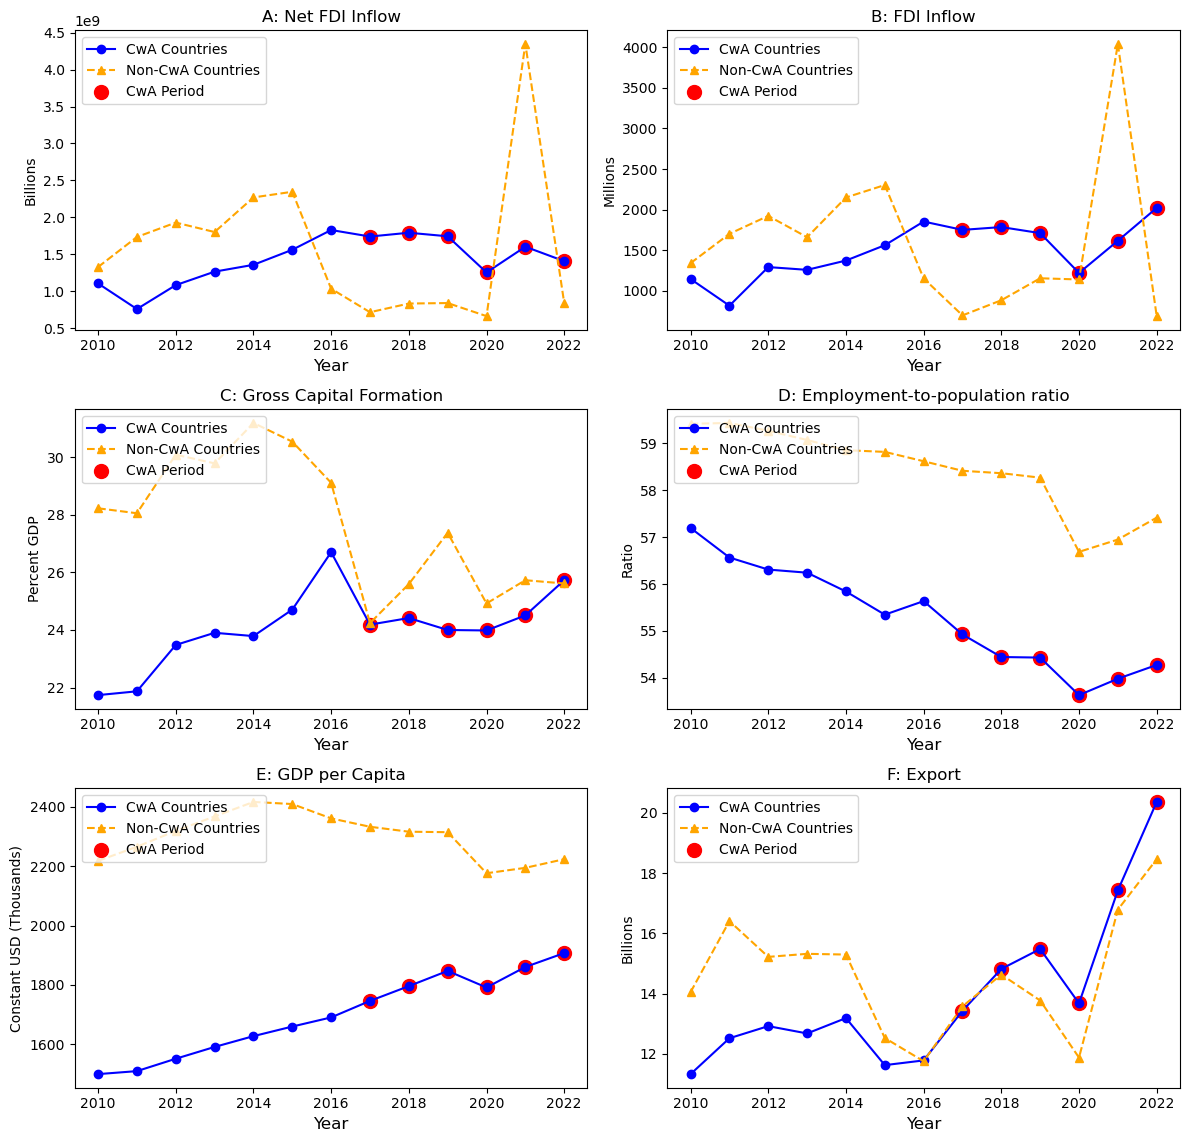

In [45]:
import matplotlib.pyplot as plt

# Mapping column names to their desired titles and units
column_info = {
    'FDIInflow': {'title': 'A: Net FDI Inflow', 'unit': 'Billions'},
    'Invest nada': {'title': 'B: FDI Inflow', 'unit': 'Millions'},
    'Employment-to-population ratio-15': {'title': 'D: Employment-to-population ratio', 'unit': 'Ratio'},
    'GDPperCap': {'title': 'E: GDP per Capita', 'unit': 'Constant USD (Thousands)'},
    'exports current usd': {'title': 'F: Export', 'unit': 'Billions'},
    'GCapForm': {'title': 'C: Gross Capital Formation', 'unit': 'Percent GDP'}
}

# Create subplots with customized styling
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Define the columns to plot
columns_to_plot = ['FDIInflow', 'Invest nada', 'GCapForm', 'Employment-to-population ratio-15', 'GDPperCap', 'exports current usd']

# Plot each variable with custom styling
for i, col in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    ax.set_title(column_info[col]['title'], fontsize=12)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel(column_info[col]['unit'], fontsize=10)  # Set y-axis label with unit
    ax.grid(True, linestyle='--', alpha=0.5)

    # Plot data for CwA Countries with blue color, solid line, and circle markers
    merged_data_cwac_1.plot(x='Year', y=col, ax=ax, label='CwA Countries', color='blue', linestyle='-', marker='o')

    # Plot data for Non-CwA Countries with orange color, dashed line, and triangle markers
    merged_data_cwac_0.plot(x='Year', y=col, ax=ax, label='Non-CwA Countries', color='orange', linestyle='--', marker='^')

    # Highlight CwA Period with red color and larger markers
    cwa_period_data = merged_data[(merged_data['CwACountries'] == 1) & (merged_data['Year'].between(2017, 2022))]
    ax.scatter(cwa_period_data['Year'], cwa_period_data[col], color='red', marker='o', s=100, label='CwA Period') 

    # Add legend for CwA Period
    ax.legend(loc='upper left')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the plot as a .png file
plt.savefig('comparison_metrics1.png')

plt.show()


In [ ]:
Propensity Score Plot

In [46]:
import matplotlib.pyplot as plt

# Extract relevant columns from each DataFrame
overall_cwa_fdi_extract = overall_cwa_fdi[['FDIInflow', 'CwACountries', 'Propensity Score', 'Year']]
overall_cwa_nada_extract = overall_cwa_nada[['Invest nada', 'CwACountries', 'Propensity Score', 'Year']]
overall_cwa_gcap_extract = overall_cwa_gcap[['GCapForm', 'CwACountries', 'Propensity Score', 'Year']]
overall_cwa_emp_extract = overall_cwa_emp[['Employment-to-population ratio-15', 'CwACountries', 'Propensity Score', 'Year']]
overall_cwa_gdp_extract = overall_cwa_gdp[['GDPperCap', 'CwACountries', 'Propensity Score', 'Year']]
overall_cwa_expt_extract = overall_cwa_expt[['exports current usd', 'CwACountries', 'Propensity Score', 'Year']]

# Group by CwACountries and Year, then aggregate by mean
overall_cwa_fdi_agg = overall_cwa_fdi_extract.groupby(['CwACountries', 'Year']).mean().reset_index()
overall_cwa_nada_agg = overall_cwa_nada_extract.groupby(['CwACountries', 'Year']).mean().reset_index()
overall_cwa_gcap_agg = overall_cwa_gcap_extract.groupby(['CwACountries', 'Year']).mean().reset_index()
overall_cwa_emp_agg = overall_cwa_emp_extract.groupby(['CwACountries', 'Year']).mean().reset_index()
overall_cwa_gdp_agg = overall_cwa_gdp_extract.groupby(['CwACountries', 'Year']).mean().reset_index()
overall_cwa_expt_agg = overall_cwa_expt_extract.groupby(['CwACountries', 'Year']).mean().reset_index()

print(overall_cwa_fdi_agg)

    CwACountries  Year     FDIInflow  Propensity Score
0              0  2010  1.326796e+09          0.420500
1              0  2011  1.733785e+09          0.422576
2              0  2012  1.928649e+09          0.424689
3              0  2013  1.800794e+09          0.416927
4              0  2014  2.269415e+09          0.417678
5              0  2015  2.346049e+09          0.417497
6              0  2016  1.032954e+09          0.419968
7              0  2017  7.146335e+08          0.413661
8              0  2018  8.322569e+08          0.412814
9              0  2019  8.387852e+08          0.409097
10             0  2020  6.619274e+08          0.399852
11             0  2021  4.348316e+09          0.398604
12             0  2022  8.404649e+08          0.411284
13             1  2010  1.104200e+09          0.434949
14             1  2011  7.575185e+08          0.428170
15             1  2012  1.081745e+09          0.419392
16             1  2013  1.264156e+09          0.413667
17        

# Figure 1A - not used

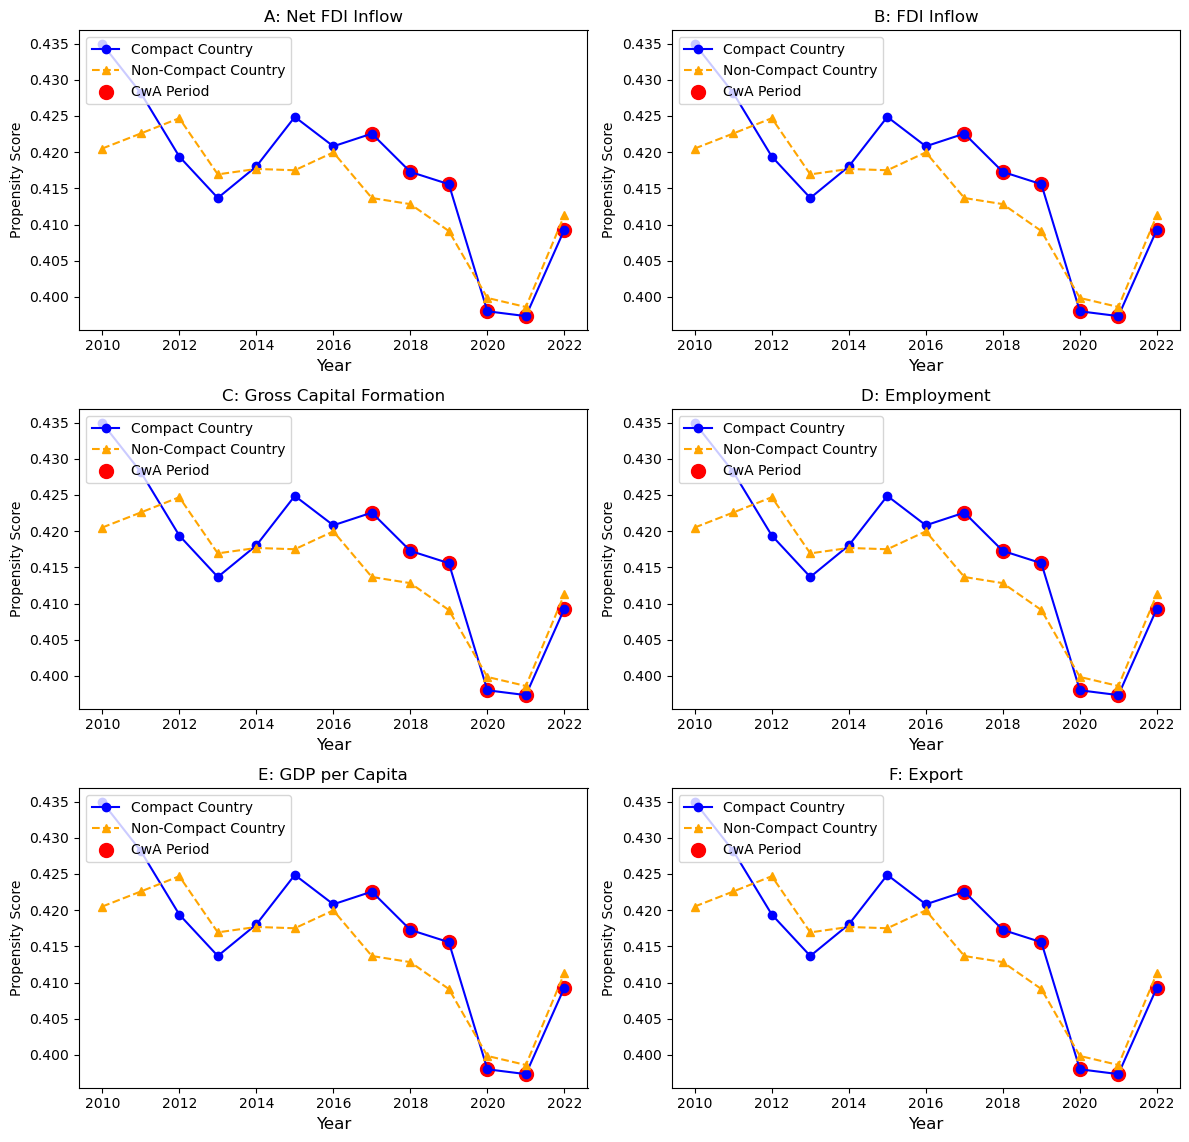

In [48]:
import matplotlib.pyplot as plt

# Mapping column names to their desired titles
column_info = {
    'FDIInflow': {'title': 'A: Net FDI Inflow'},
    'Invest nada': {'title': 'B: FDI Inflow'},
    'Employment-to-population ratio-15': {'title': 'D: Employment'},
    'GDPperCap': {'title': 'E: GDP per Capita'},
    'exports current usd': {'title': 'F: Export'},
    'GCapForm': {'title': 'C: Gross Capital Formation'}
}

# Create subplots with customized styling
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Define the columns to plot
columns_to_plot = ['FDIInflow', 'Invest nada', 'GCapForm', 'Employment-to-population ratio-15', 'GDPperCap', 'exports current usd']

# Plot each variable with custom styling
for i, col in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    ax.set_title(column_info[col]['title'], fontsize=12)
    ax.set_xlabel('Year', fontsize=12)
    ax.set_ylabel('Propensity Score', fontsize=10)  # Set y-axis label
    ax.grid(True, linestyle='--', alpha=0.5)

    # Plot Propensity Score data for CwA Countries with blue color, solid line, and circle markers
    merged_data_cwac_1.plot(x='Year', y='Propensity Score', ax=ax, label='Compact Country', color='blue', linestyle='-', marker='o')

    # Plot Propensity Score data for Non-CwA Countries with orange color, dashed line, and triangle markers
    merged_data_cwac_0.plot(x='Year', y='Propensity Score', ax=ax, label='Non-Compact Country', color='orange', linestyle='--', marker='^')

    # Highlight CwA Period with red color and larger markers
    cwa_period_data = merged_data[(merged_data['CwACountries'] == 1) & (merged_data['Year'].between(2017, 2022))]
    ax.scatter(cwa_period_data['Year'], cwa_period_data['Propensity Score'], color='red', marker='o', s=100, label='CwA Period')

    # Add legend for each subplot
    ax.legend(loc='upper left')

# Adjust layout and save the plot as a .png file
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('comparison_metrics_propensity_score.png')
plt.show()


# Standardization - dataframe names: overall_cwa_fdi, overall_cwa_nada, overall_cwa_gcap, overall_cwa_emp, overall_cwa_gdp, overall_cwa_expt

In [50]:
print(overall_cwa_fdi.head())

   id  Year Country  treat  CwACountries  CovidDummy       Pop   TradeGDP  \
0   2  2010   Benin      0             1           0   9445710  51.430860   
1   2  2011   Benin      0             1           0   9726380  47.217029   
2   2  2012   Benin      0             1           0  10014078  50.736737   
3   2  2013   Benin      0             1           0  10308730  59.200192   
4   2  2014   Benin      0             1           0  10614844  65.268275   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      0.261260   2.114065  ...                 2964.658   
1      0.318356   2.963753  ...                 3059.158   
2      0.364368   4.811223  ...                 3126.340   
3      0.301189   7.191434  ...                 3190.770   
4      0.027140   6.357679  ...                 3251.825   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                             85.958                             71.118   
1                         

In [ ]:
FDI

In [51]:
from sklearn.preprocessing import StandardScaler

# Assuming overall_cwa_fdi is already loaded
overall_cwa_fdi1 = overall_cwa_fdi.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in overall_cwa_fdi1.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(overall_cwa_fdi1[columns_to_standardize])

# Create a DataFrame with the standardized columns without adding any suffix
standardized_df = pd.DataFrame(standardized_data, columns=columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
overall_cwa_fdi_std = pd.concat([overall_cwa_fdi1[exclude_columns], standardized_df], axis=1)

# Print the first few rows of the new DataFrame
print(overall_cwa_fdi_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   2  2010   Benin      0             1           0 -0.626591 -0.447281   
1   2  2011   Benin      0             1           0 -0.619751 -0.622891   
2   2  2012   Benin      0             1           0 -0.612740 -0.476208   
3   2  2013   Benin      0             1           0 -0.605559 -0.123497   
4   2  2014   Benin      0             1           0 -0.598099  0.129388   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      1.434784  -0.452547  ...                -0.586430   
1      1.516295  -0.249235  ...                -0.577977   
2      1.581980   0.192825  ...                -0.571968   
3      1.491787   0.762358  ...                -0.566205   
4      1.100555   0.562858  ...                -0.560743   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.265894                           0.960605   
1                           1.25

In [ ]:
FDI Nada

In [52]:
# Assuming overall_cwa_nada is already loaded
overall_cwa_nada1 = overall_cwa_nada.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in overall_cwa_nada1.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(overall_cwa_nada1[columns_to_standardize])

# Create a DataFrame with the standardized columns and add the _nada suffix
standardized_df_nada = pd.DataFrame(standardized_data, columns= columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
overall_cwa_nada_std = pd.concat([overall_cwa_nada1[exclude_columns], standardized_df_nada], axis=1)

# Print the first few rows of the new DataFrame
print(overall_cwa_nada_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   2  2010   Benin      0             1           0 -0.626591 -0.447281   
1   2  2011   Benin      0             1           0 -0.619751 -0.622891   
2   2  2012   Benin      0             1           0 -0.612740 -0.476208   
3   2  2013   Benin      0             1           0 -0.605559 -0.123497   
4   2  2014   Benin      0             1           0 -0.598099  0.129388   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      1.434784  -0.452547  ...                -0.586430   
1      1.516295  -0.249235  ...                -0.577977   
2      1.581980   0.192825  ...                -0.571968   
3      1.491787   0.762358  ...                -0.566205   
4      1.100555   0.562858  ...                -0.560743   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.265894                           0.960605   
1                           1.25

In [ ]:
Gcap

In [53]:
# Assuming overall_cwa_gcap is already loaded
overall_cwa_gcap1 = overall_cwa_gcap.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in overall_cwa_gcap1.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(overall_cwa_gcap1[columns_to_standardize])

# Create a DataFrame with the standardized columns and add the _gcap suffix
standardized_df_gcap = pd.DataFrame(standardized_data, columns= columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
overall_cwa_gcap_std = pd.concat([overall_cwa_gcap1[exclude_columns], standardized_df_gcap], axis=1)

# Print the first few rows of the new DataFrame
print(overall_cwa_gcap_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   2  2010   Benin      0             1           0 -0.552127 -0.687276   
1   2  2011   Benin      0             1           0 -0.545535 -0.867143   
2   2  2012   Benin      0             1           0 -0.538777 -0.716904   
3   2  2013   Benin      0             1           0 -0.531857 -0.355642   
4   2  2014   Benin      0             1           0 -0.524667 -0.096626   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      1.287380  -0.506294  ...                -0.524531   
1      1.370888  -0.293869  ...                -0.516449   
2      1.438183   0.168004  ...                -0.510702   
3      1.345780   0.763065  ...                -0.505191   
4      0.944961   0.554624  ...                -0.499969   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.343905                           1.029121   
1                           1.33

In [ ]:
Emp

In [54]:
# Assuming overall_cwa_emp is already loaded
overall_cwa_emp1 = overall_cwa_emp.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in overall_cwa_emp1.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(overall_cwa_emp1[columns_to_standardize])

# Create a DataFrame with the standardized columns and add the _emp suffix
standardized_df_emp = pd.DataFrame(standardized_data, columns= columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
overall_cwa_emp_std = pd.concat([overall_cwa_emp1[exclude_columns], standardized_df_emp], axis=1)

# Print the first few rows of the new DataFrame
print(overall_cwa_emp_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   2  2010   Benin      0             1           0 -0.664429 -0.606809   
1   2  2011   Benin      0             1           0 -0.654969 -0.800288   
2   2  2012   Benin      0             1           0 -0.645272 -0.638679   
3   2  2013   Benin      0             1           0 -0.635340 -0.250077   
4   2  2014   Benin      0             1           0 -0.625022  0.028541   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      1.382038  -0.521010  ...                -0.602692   
1      1.464406  -0.311070  ...                -0.591659   
2      1.530783   0.145402  ...                -0.583816   
3      1.439640   0.733502  ...                -0.576295   
4      1.044291   0.527499  ...                -0.569167   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.277594                           1.083584   
1                           1.26

In [ ]:
GDP

In [55]:
# Assuming overall_cwa_gdp is already loaded
overall_cwa_gdp1 = overall_cwa_gdp.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in overall_cwa_gdp1.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(overall_cwa_gdp1[columns_to_standardize])

# Create a DataFrame with the standardized columns and add the _gdp suffix
standardized_df_gdp = pd.DataFrame(standardized_data, columns= columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
overall_cwa_gdp_std = pd.concat([overall_cwa_gdp1[exclude_columns], standardized_df_gdp], axis=1)

# Print the first few rows of the new DataFrame
print(overall_cwa_gdp_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   2  2010   Benin      0             1           0 -0.552127 -0.687276   
1   2  2011   Benin      0             1           0 -0.545535 -0.867143   
2   2  2012   Benin      0             1           0 -0.538777 -0.716904   
3   2  2013   Benin      0             1           0 -0.531857 -0.355642   
4   2  2014   Benin      0             1           0 -0.524667 -0.096626   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      1.287380  -0.506294  ...                -0.524531   
1      1.370888  -0.293869  ...                -0.516449   
2      1.438183   0.168004  ...                -0.510702   
3      1.345780   0.763065  ...                -0.505191   
4      0.944961   0.554624  ...                -0.499969   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.343905                           1.029121   
1                           1.33

In [ ]:
Export

In [56]:
# Assuming overall_cwa_expt is already loaded
overall_cwa_expt1 = overall_cwa_expt.copy()

# Columns to exclude from standardization
exclude_columns = ['id', 'Year', 'Country', 'treat', 'CwACountries', 'CovidDummy']

# Identify columns to be standardized
columns_to_standardize = [col for col in overall_cwa_expt1.columns if col not in exclude_columns]

# Standardize the columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(overall_cwa_expt1[columns_to_standardize])

# Create a DataFrame with the standardized columns and add the _expt suffix
standardized_df_expt = pd.DataFrame(standardized_data, columns= columns_to_standardize)

# Concatenate the standardized columns with the original DataFrame
overall_cwa_expt_std = pd.concat([overall_cwa_expt1[exclude_columns], standardized_df_expt], axis=1)

# Print the first few rows of the new DataFrame
print(overall_cwa_expt_std.head())


   id  Year Country  treat  CwACountries  CovidDummy       Pop  TradeGDP  \
0   2  2010   Benin      0             1           0 -0.641926 -0.630891   
1   2  2011   Benin      0             1           0 -0.632369 -0.794575   
2   2  2012   Benin      0             1           0 -0.622573 -0.657854   
3   2  2013   Benin      0             1           0 -0.612540 -0.329097   
4   2  2014   Benin      0             1           0 -0.602116 -0.093387   

   PolStability  GDPGrowth  ...  Employment-thousands-25  \
0      0.955308  -0.393678  ...                -0.565167   
1      1.022625  -0.214633  ...                -0.553631   
2      1.076872   0.174662  ...                -0.545431   
3      1.002385   0.676215  ...                -0.537566   
4      0.679281   0.500528  ...                -0.530113   

   Employment-to-population ratio-25  Employment-to-population ratio-15  \
0                           1.541286                           1.341515   
1                           1.52

                 DataFrame  Standardized Mean Difference
0           Net FDI Inflow                      0.035729
1               FDI Inflow                      0.035729
2  Gross Capital Formation                      0.070102
3               Employment                     -0.167240
4           GDP Per Capita                      0.073323
5                   Export                     -0.089367


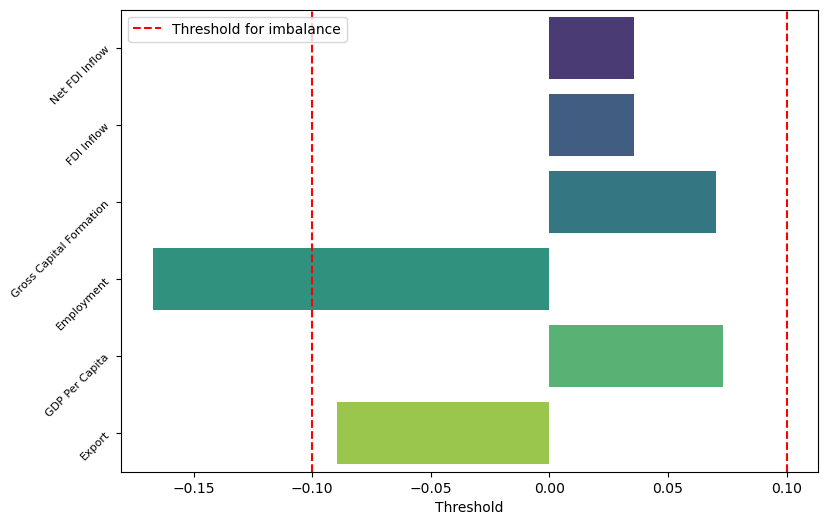

In [57]:
# Define the function to calculate SMD for 'Propensity Score'
def calculate_smd(df, treatment_col, covariate):
    treated = df[df[treatment_col] == 1][covariate]
    control = df[df[treatment_col] == 0][covariate]
    mean_diff = np.mean(treated) - np.mean(control)
    pooled_std = np.sqrt((np.std(treated, ddof=1) ** 2 + np.std(control, ddof=1) ** 2) / 2)
    smd = mean_diff / pooled_std
    return smd

# List of DataFrames and their names
dataframes = {
    'Net FDI Inflow': overall_cwa_fdi_std,
    'FDI Inflow': overall_cwa_nada_std,
    'Gross Capital Formation': overall_cwa_gcap_std,
    'Employment': overall_cwa_emp_std,
    'GDP Per Capita': overall_cwa_gdp_std,
    'Export': overall_cwa_expt_std
}

# Calculate SMD for 'Propensity Score' in each DataFrame
smd_results = {}
for name, df in dataframes.items():
    smd = calculate_smd(df, 'CwACountries', 'Propensity Score')
    smd_results[name] = smd

# Convert the results into a DataFrame for better visualization
smd_df = pd.DataFrame.from_dict(smd_results, orient='index', columns=['Standardized Mean Difference'])
smd_df.index.name = 'DataFrame'
smd_df = smd_df.reset_index()

# Print the results
print(smd_df)

# Plotting the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 6))
sns.barplot(x='Standardized Mean Difference', y='DataFrame', data=smd_df, palette='viridis')
plt.axvline(0.1, color='red', linestyle='--', label='Threshold for imbalance')
plt.axvline(-0.1, color='red', linestyle='--')
plt.title('')

# Remove x and y labels and set font size for variable names
plt.xlabel('Threshold')
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=8, rotation=45)
plt.legend()

# Save the plot as a PNG file
plt.savefig('smd_propensity_score_plot.png')

# Show the plot
plt.show()


# ML Estimation - Obtaining Table 1 and 2

# Modeling FDI net inflow

In [58]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from statsmodels.api import add_constant, OLS
from sklearn.utils import resample
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming overall_cwa_fdi is already loaded
df_fdi = overall_cwa_fdi_std.copy()

# Define outcome, treatment, and covariates
y_fdi = df_fdi['FDIInflow']
A_fdi = df_fdi['CwACountries']
X_fdi = df_fdi[['exports current usd', 'trade percent of gdp', 'imports current usd', 
                'Employment-to-population ratio-15', 'GDPpConstant', 'GDSavings', 'NatRent', 
                'GDPGrowth', 'Control of corruption', 
                'Inflation consumer prices annual percent', 'NetODA', 
                'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
                'Political Stability and Absence of violence or terrorism', 'GDPperCap', 
                'CovidDummy']]


In [59]:
def compute_tmle_estimate_fdi(df, outcome_model, treatment_model):
    y_fdi = df['FDIInflow']
    A_fdi = df['CwACountries']
    X_fdi = df[['exports current usd', 'trade percent of gdp', 'imports current usd', 
                'Employment-to-population ratio-15', 'GDPpConstant', 'GDSavings', 'NatRent', 
                'GDPGrowth', 'Control of corruption', 
                'Inflation consumer prices annual percent', 'NetODA', 
                'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
                'Political Stability and Absence of violence or terrorism', 'GDPperCap', 
                'CovidDummy']]
    P_fdi = df['Propensity Score']

    # Split data for cross-fitting
    X_train_fdi, X_test_fdi, y_train_fdi, y_test_fdi, A_train_fdi, A_test_fdi, P_train_fdi, P_test_fdi = train_test_split(X_fdi, y_fdi, A_fdi, P_fdi, test_size=0.2, random_state=42)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_fdi, A_train_fdi], axis=1), y_train_fdi)
    y_hat_fdi = outcome_model.predict(pd.concat([X_test_fdi, A_test_fdi], axis=1))

    # Initial Treatment Model
    treatment_model.fit(X_train_fdi, A_train_fdi)
    A_hat_fdi = P_test_fdi  

    # Compute clever covariate
    clever_covariate_fdi = A_test_fdi - A_hat_fdi

    # Update the initial outcome model
    epsilon_model_fdi = OLS(y_test_fdi, add_constant(clever_covariate_fdi)).fit()
    epsilon_fdi = epsilon_model_fdi.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_fdi = y_hat_fdi + epsilon_fdi * clever_covariate_fdi

    # Estimate the treatment effect
    treatment_effect_fdi = np.mean(y_star_fdi[A_test_fdi == 1]) - np.mean(y_star_fdi[A_test_fdi == 0])
    
    # Calculate p-value
    p_value_fdi = epsilon_model_fdi.pvalues.iloc[1]
    
    return treatment_effect_fdi, y_test_fdi, y_star_fdi, p_value_fdi


In [60]:
def bootstrap_tmle_fdi(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_fdi = []
    p_values_fdi = []
    r_squared_values_fdi = []
    rmse_values_fdi = []
    mae_values_fdi = []

    for i in range(n_iterations):
        sample_df_fdi = resample(df)
        treatment_effect_fdi, y_test_sample_fdi, y_star_sample_fdi, p_value_fdi = compute_tmle_estimate_fdi(sample_df_fdi, outcome_model, treatment_model)
        bootstrap_estimates_fdi.append(treatment_effect_fdi)
        p_values_fdi.append(p_value_fdi)
        r_squared_fdi = r2_score(y_test_sample_fdi, y_star_sample_fdi)
        rmse_fdi = np.sqrt(mean_squared_error(y_test_sample_fdi, y_star_sample_fdi))
        mae_fdi = mean_absolute_error(y_test_sample_fdi, y_star_sample_fdi)
        r_squared_values_fdi.append(r_squared_fdi)
        rmse_values_fdi.append(rmse_fdi)
        mae_values_fdi.append(mae_fdi)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_fdi = np.mean(bootstrap_estimates_fdi)
    bootstrap_se_fdi = np.std(bootstrap_estimates_fdi)

    # Calculate the 95% confidence interval
    lower_ci_fdi = np.percentile(bootstrap_estimates_fdi, 2.5)
    upper_ci_fdi = np.percentile(bootstrap_estimates_fdi, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_fdi = np.mean(r_squared_values_fdi)
    mean_rmse_fdi = np.mean(rmse_values_fdi)
    mean_mae_fdi = np.mean(mae_values_fdi)
    
    # Calculate mean p-value
    mean_p_value_fdi = np.mean(p_values_fdi)

    return {
        'Estimated Treatment Effect': bootstrap_mean_fdi,
        'Bootstrap Standard Error': bootstrap_se_fdi,
        '95% Confidence Interval Lower Bound': lower_ci_fdi,
        '95% Confidence Interval Upper Bound': upper_ci_fdi,
        'Mean R-Squared': mean_r_squared_fdi,
        'Mean RMSE': mean_rmse_fdi,
        'Mean MAE': mean_mae_fdi,
        'Mean P-Value': mean_p_value_fdi
    }


In [61]:
models_fdi = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_fdi = []

for model_name_fdi, (outcome_model_fdi, treatment_model_fdi) in models_fdi.items():
    result_fdi = bootstrap_tmle_fdi(df_fdi, outcome_model_fdi, treatment_model_fdi)
    result_fdi['Model'] = model_name_fdi
    results_fdi.append(result_fdi)

results_fdi_df = pd.DataFrame(results_fdi, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_fdi_df)


               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                    0.298480                  0.323507   
1      Random Forest                    0.299580                  0.290306   
2            XGBoost                    0.331532                  0.305244   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                            -0.413069                             0.913166   
1                            -0.289255                             0.870215   
2                            -0.265434                             0.929147   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.162019   0.701988  0.412828      0.005519  
1        0.249902   0.709407  0.416659      0.005578  
2        0.318024   0.674944  0.400583      0.006584  


In [ ]:
Plotting

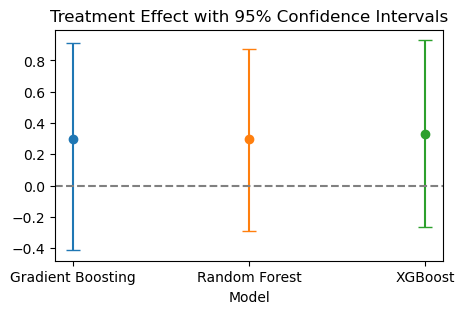

In [62]:
import matplotlib.pyplot as plt

def plot_treatment_effects(results_fdi, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_fdi.iterrows():
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                           [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')

    # Add suffix _fdi to the filename
    filename_with_suffix = filename.replace('.png', '_fdi.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_fdi_df, 'treatment_effects_plot_fdi.png')


In [ ]:
Residual Plot

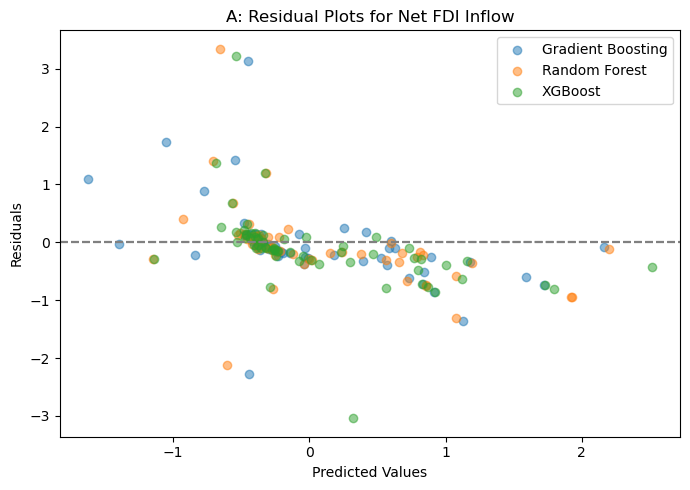

In [63]:
import matplotlib.pyplot as plt

def plot_residuals(y_test_fdi, y_star_fdi, model_name_fdi, ax_fdi):
    residuals_fdi = y_test_fdi - y_star_fdi
    ax_fdi.scatter(y_star_fdi, residuals_fdi, alpha=0.5, label=model_name_fdi)
    ax_fdi.axhline(0, color='gray', linestyle='--')
    ax_fdi.set_xlabel('Predicted Values')
    ax_fdi.set_ylabel('Residuals')

# Assuming you have three models in the 'models_fdi' dictionary
fig_fdi, ax_fdi = plt.subplots(figsize=(7, 5)) 

for model_name_fdi, (outcome_model_fdi, treatment_model_fdi) in models_fdi.items():
    treatment_effect_fdi, y_test_fdi, y_star_fdi, _ = compute_tmle_estimate_fdi(df_fdi, outcome_model_fdi, treatment_model_fdi)
    plot_residuals(y_test_fdi, y_star_fdi, model_name_fdi, ax_fdi)

ax_fdi.set_title('A: Residual Plots for Net FDI Inflow')
ax_fdi.legend(title=None) 
plt.tight_layout()
plt.savefig('residual_plots_fdi.png')
plt.show()

# Invest nada - FDI Inflow

In [65]:
# Assuming overall_cwa_nada_std is already loaded
df_nada = overall_cwa_nada_std.copy()

# Define outcome, treatment, and covariates
y_nada = df_nada['Invest nada']
A_nada = df_nada['CwACountries']
X_nada = df_nada[['exports current usd', 'trade percent of gdp', 'imports current usd', 
                'Employment-to-population ratio-15', 'GDPpConstant', 'GDSavings', 'NatRent', 
                'GDPGrowth', 'Control of corruption', 
                'Inflation consumer prices annual percent', 'NetODA', 
                'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
                'Political Stability and Absence of violence or terrorism', 'GDPperCap', 
                'CovidDummy']]
P_nada = df_nada['Propensity Score']

In [66]:
def compute_tmle_estimate_nada(df, outcome_model, treatment_model):
    y_nada = df['Invest nada']
    A_nada = df['CwACountries']
    X_nada = df[['exports current usd', 'trade percent of gdp', 'imports current usd', 
                'Employment-to-population ratio-15', 'GDPpConstant', 'GDSavings', 'NatRent', 
                'GDPGrowth', 'Control of corruption', 
                'Inflation consumer prices annual percent', 'NetODA', 
                'Pop', 'UrbanPopT', 'ExchangeRate', 'Rule of Law', 'Government Effectiveness', 
                'Political Stability and Absence of violence or terrorism', 'GDPperCap', 
                'CovidDummy']]
    P_nada = df['Propensity Score']

    # Split data for cross-fitting
    X_train_nada, X_test_nada, y_train_nada, y_test_nada, A_train_nada, A_test_nada, P_train_nada, P_test_nada = train_test_split(X_nada, y_nada, A_nada, P_nada, test_size=0.2)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_nada, A_train_nada], axis=1), y_train_nada)
    y_hat_nada = outcome_model.predict(pd.concat([X_test_nada, A_test_nada], axis=1))

    # Initial Treatment Model
    treatment_model.fit(X_train_nada, A_train_nada)
    A_hat_nada = P_test_nada 

    # Compute clever covariate
    clever_covariate_nada = A_test_nada - A_hat_nada

    # Update the initial outcome model
    epsilon_model_nada = OLS(y_test_nada, add_constant(clever_covariate_nada)).fit()
    epsilon_nada = epsilon_model_nada.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_nada = y_hat_nada + epsilon_nada * clever_covariate_nada

    # Estimate the treatment effect
    treatment_effect_nada = np.mean(y_star_nada[A_test_nada == 1]) - np.mean(y_star_nada[A_test_nada == 0])
    
    # Calculate p-value
    p_value_nada = epsilon_model_nada.pvalues.iloc[1]
    
    return treatment_effect_nada, y_test_nada, y_star_nada, p_value_nada


In [67]:
def bootstrap_tmle_nada(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_nada = []
    p_values_nada = []
    r_squared_values_nada = []
    rmse_values_nada = []
    mae_values_nada = []

    for i in range(n_iterations):
        sample_df_nada = resample(df)
        treatment_effect_nada, y_test_sample_nada, y_star_sample_nada, p_value_nada = compute_tmle_estimate_nada(sample_df_nada, outcome_model, treatment_model)
        bootstrap_estimates_nada.append(treatment_effect_nada)
        p_values_nada.append(p_value_nada)
        r_squared_nada = r2_score(y_test_sample_nada, y_star_sample_nada)
        rmse_nada = np.sqrt(mean_squared_error(y_test_sample_nada, y_star_sample_nada))
        mae_nada = mean_absolute_error(y_test_sample_nada, y_star_sample_nada)
        r_squared_values_nada.append(r_squared_nada)
        rmse_values_nada.append(rmse_nada)
        mae_values_nada.append(mae_nada)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_nada = np.mean(bootstrap_estimates_nada)
    bootstrap_se_nada = np.std(bootstrap_estimates_nada)

    # Calculate the 95% confidence interval
    lower_ci_nada = np.percentile(bootstrap_estimates_nada, 2.5)
    upper_ci_nada = np.percentile(bootstrap_estimates_nada, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_nada = np.mean(r_squared_values_nada)
    mean_rmse_nada = np.mean(rmse_values_nada)
    mean_mae_nada = np.mean(mae_values_nada)
    
    # Calculate mean p-value
    mean_p_value_nada = np.mean(p_values_nada)

    return {
        'Estimated Treatment Effect': bootstrap_mean_nada,
        'Bootstrap Standard Error': bootstrap_se_nada,
        '95% Confidence Interval Lower Bound': lower_ci_nada,
        '95% Confidence Interval Upper Bound': upper_ci_nada,
        'Mean R-Squared': mean_r_squared_nada,
        'Mean RMSE': mean_rmse_nada,
        'Mean MAE': mean_mae_nada,
        'Mean P-Value': mean_p_value_nada
    }


In [68]:
models_nada = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_nada = []

for model_name_nada, (outcome_model_nada, treatment_model_nada) in models_nada.items():
    result_nada = bootstrap_tmle_nada(df_nada, outcome_model_nada, treatment_model_nada)
    result_nada['Model'] = model_name_nada
    results_nada.append(result_nada)

results_nada_df = pd.DataFrame(results_nada, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_nada_df)

               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                    0.334084                  0.304069   
1      Random Forest                    0.334943                  0.298916   
2            XGBoost                    0.365217                  0.307565   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                            -0.254014                             0.925406   
1                            -0.251735                             0.949233   
2                            -0.216720                             0.987781   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.214721   0.698981  0.416610      0.003455  
1        0.242354   0.690927  0.415062      0.004496  
2        0.266365   0.681408  0.409468      0.004628  


In [ ]:
Plotting

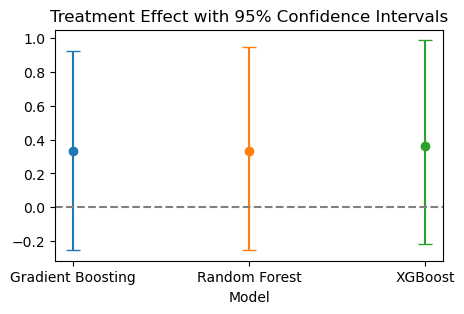

In [69]:
def plot_treatment_effects(results_nada, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_nada.iterrows():
        yerr_lower = row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']
        yerr_upper = row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']
        yerr = [[max(0, yerr_lower)], [max(0, yerr_upper)]]
        
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=yerr,
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')


    # Add suffix _nada to the filename
    filename_with_suffix = filename.replace('.png', '_nada.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_nada_df, 'treatment_effects_plot_nada.png')


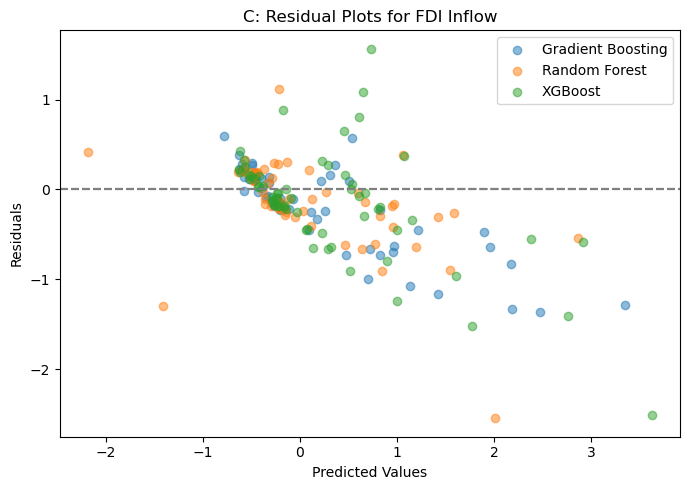

In [72]:
def plot_residuals_nada(y_test_nada, y_star_nada, model_name_nada, ax_nada):
    residuals_nada = y_test_nada - y_star_nada
    ax_nada.scatter(y_star_nada, residuals_nada, alpha=0.5, label=model_name_nada)
    ax_nada.axhline(0, color='gray', linestyle='--')
    ax_nada.set_xlabel('Predicted Values')
    ax_nada.set_ylabel('Residuals')

# Assuming you have three models in the 'models_nada' dictionary
fig_nada, ax_nada = plt.subplots(figsize=(7, 5))

for model_name_nada, (outcome_model_nada, treatment_model_nada) in models_nada.items():
    treatment_effect_nada, y_test_nada, y_star_nada, _ = compute_tmle_estimate_nada(df_nada, outcome_model_nada, treatment_model_nada)
    plot_residuals_nada(y_test_nada, y_star_nada, model_name_nada, ax_nada)

ax_nada.set_title('C: Residual Plots for FDI Inflow')
ax_nada.legend(title=None)
plt.tight_layout()
plt.savefig('residual_plots_nada.png')
plt.show()


# Gross Capital formation

In [73]:
# Assuming overall_cwa_gcap_std is already loaded
df_gcap = overall_cwa_gcap_std.copy()

# Define outcome, treatment, and covariates
y_gcap = df_gcap['GCapForm']
A_gcap = df_gcap['CwACountries']
X_gcap = df_gcap[['trade percent of gdp', 'GDSavings', 'GDPGrowth', 'NatRent', 'UrbanPopT', 'GDPDeflator', 'NetTrade', 
                  'Inflation consumer prices annual percent', 'ConsumerPrices', 'Political Stability and Absence of violence or terrorism', 
                  'Government Effectiveness', 'Rule of Law', 'Pop', 'Employment-to-population ratio-15', 'Invest nada', 'GDPperCap', 
                  'FDIInflow', 'CovidDummy']]
P_gcap = df_gcap['Propensity Score']


In [74]:
def compute_tmle_estimate_gcap(df, outcome_model, treatment_model):
    y_gcap = df['GCapForm']
    A_gcap = df['CwACountries']
    X_gcap = df[['trade percent of gdp', 'GDSavings', 'GDPGrowth', 'NatRent', 'UrbanPopT', 'GDPDeflator', 'NetTrade', 
                 'Inflation consumer prices annual percent', 'ConsumerPrices', 'Political Stability and Absence of violence or terrorism', 
                 'Government Effectiveness', 'Rule of Law', 'Pop', 'Employment-to-population ratio-15', 'Invest nada', 'GDPperCap', 
                 'FDIInflow', 'CovidDummy']]
    P_gcap = df['Propensity Score']

    # Split data for cross-fitting
    X_train_gcap, X_test_gcap, y_train_gcap, y_test_gcap, A_train_gcap, A_test_gcap, P_train_gcap, P_test_gcap = train_test_split(
        X_gcap, y_gcap, A_gcap, P_gcap, test_size=0.2, random_state=42)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_gcap, A_train_gcap], axis=1), y_train_gcap)
    y_hat_gcap = outcome_model.predict(pd.concat([X_test_gcap, A_test_gcap], axis=1))

    # Compute clever covariate
    clever_covariate_gcap = A_test_gcap - P_test_gcap

    # Update the initial outcome model
    epsilon_model_gcap = OLS(y_test_gcap, add_constant(clever_covariate_gcap)).fit()
    epsilon_gcap = epsilon_model_gcap.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_gcap = y_hat_gcap + epsilon_gcap * clever_covariate_gcap

    # Estimate the treatment effect
    treatment_effect_gcap = np.mean(y_star_gcap[A_test_gcap == 1]) - np.mean(y_star_gcap[A_test_gcap == 0])
    
    # Calculate p-value
    p_value_gcap = epsilon_model_gcap.pvalues.iloc[1]
    
    return treatment_effect_gcap, y_test_gcap, y_star_gcap, p_value_gcap


In [75]:
def bootstrap_tmle_gcap(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_gcap = []
    p_values_gcap = []
    r_squared_values_gcap = []
    rmse_values_gcap = []
    mae_values_gcap = []

    for i in range(n_iterations):
        sample_df_gcap = resample(df)
        treatment_effect_gcap, y_test_sample_gcap, y_star_sample_gcap, p_value_gcap = compute_tmle_estimate_gcap(sample_df_gcap, outcome_model, treatment_model)
        bootstrap_estimates_gcap.append(treatment_effect_gcap)
        p_values_gcap.append(p_value_gcap)
        r_squared_gcap = r2_score(y_test_sample_gcap, y_star_sample_gcap)
        rmse_gcap = np.sqrt(mean_squared_error(y_test_sample_gcap, y_star_sample_gcap))
        mae_gcap = mean_absolute_error(y_test_sample_gcap, y_star_sample_gcap)
        r_squared_values_gcap.append(r_squared_gcap)
        rmse_values_gcap.append(rmse_gcap)
        mae_values_gcap.append(mae_gcap)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_gcap = np.mean(bootstrap_estimates_gcap)
    bootstrap_se_gcap = np.std(bootstrap_estimates_gcap)

    # Calculate the 95% confidence interval
    lower_ci_gcap = np.percentile(bootstrap_estimates_gcap, 2.5)
    upper_ci_gcap = np.percentile(bootstrap_estimates_gcap, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_gcap = np.mean(r_squared_values_gcap)
    mean_rmse_gcap = np.mean(rmse_values_gcap)
    mean_mae_gcap = np.mean(mae_values_gcap)
    
    # Calculate mean p-value
    mean_p_value_gcap = np.mean(p_values_gcap)

    return {
        'Estimated Treatment Effect': bootstrap_mean_gcap,
        'Bootstrap Standard Error': bootstrap_se_gcap,
        '95% Confidence Interval Lower Bound': lower_ci_gcap,
        '95% Confidence Interval Upper Bound': upper_ci_gcap,
        'Mean R-Squared': mean_r_squared_gcap,
        'Mean RMSE': mean_rmse_gcap,
        'Mean MAE': mean_mae_gcap,
        'Mean P-Value': mean_p_value_gcap
    }


In [76]:
models_gcap = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_gcap = []

for model_name_gcap, (outcome_model_gcap, treatment_model_gcap) in models_gcap.items():
    result_gcap = bootstrap_tmle_gcap(df_gcap, outcome_model_gcap, treatment_model_gcap)
    result_gcap['Model'] = model_name_gcap
    results_gcap.append(result_gcap)

results_gcap_df = pd.DataFrame(results_gcap, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_gcap_df)


               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                   -0.407999                  0.303534   
1      Random Forest                   -0.406122                  0.286563   
2            XGBoost                   -0.418383                  0.310591   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                            -1.064980                             0.142114   
1                            -1.011061                             0.157074   
2                            -1.065108                             0.120465   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.816922   0.401974  0.248743      0.395837  
1        0.782850   0.442094  0.269381      0.391788  
2        0.767799   0.452146  0.253384      0.380559  


In [ ]:
Plotting

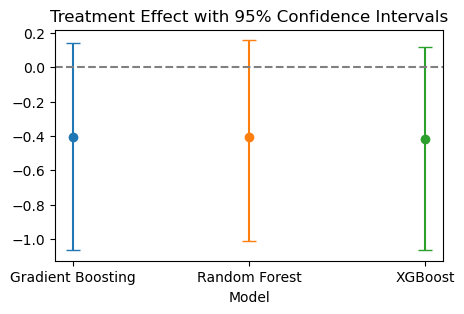

In [77]:
def plot_treatment_effects(results_gcap, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_gcap.iterrows():
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                           [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')

    # Add suffix _gcap to the filename
    filename_with_suffix = filename.replace('.png', '_gcap.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_gcap_df, 'treatment_effects_plot_gcap.png')


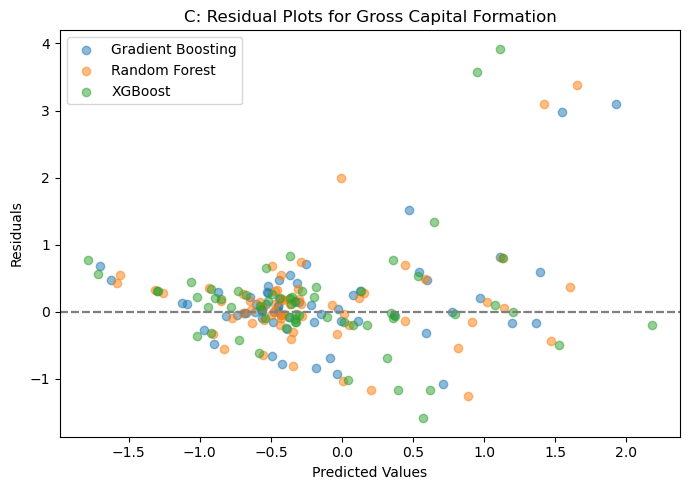

In [78]:
def plot_residuals_gcap(y_test_gcap, y_star_gcap, model_name_gcap, ax_gcap):
    residuals_gcap = y_test_gcap - y_star_gcap
    ax_gcap.scatter(y_star_gcap, residuals_gcap, alpha=0.5, label=model_name_gcap)
    ax_gcap.axhline(0, color='gray', linestyle='--')
    ax_gcap.set_xlabel('Predicted Values')
    ax_gcap.set_ylabel('Residuals')

# Assuming you have three models in the 'models_gcap' dictionary
fig_gcap, ax_gcap = plt.subplots(figsize=(7, 5))

for model_name_gcap, (outcome_model_gcap, treatment_model_gcap) in models_gcap.items():
    treatment_effect_gcap, y_test_gcap, y_star_gcap, _ = compute_tmle_estimate_gcap(df_gcap, outcome_model_gcap, treatment_model_gcap)
    plot_residuals_gcap(y_test_gcap, y_star_gcap, model_name_gcap, ax_gcap)

ax_gcap.set_title('C: Residual Plots for Gross Capital Formation')
ax_gcap.legend(title=None)
plt.tight_layout()
plt.savefig('residual_plots_gcap.png')
plt.show()


# Employment

In [82]:
# Assuming overall_cwa_emp_std is already loaded
df_emp = overall_cwa_emp_std.copy()

# Define outcome, treatment, and covariates
y_emp = df_emp['Employment-to-population ratio-15']
A_emp = df_emp['CwACountries']
X_emp = df_emp[['Inflation consumer prices annual percent', 'GDPperCap', 'Political Stability and Absence of violence or terrorism', 
                'ExchangeRate', 'Pop', 'Government Effectiveness', 'UrbanPopT', 'ElectAccess', 'GovtExpd', 'Rule of Law', 'NatRent', 
                'Invest nada', 'GDPpConstant', 'GDPGrowth', 'Control of corruption', 'exports current usd', 'imports current usd', 
                'trade percent of gdp', 'FDIInflow', 'CovidDummy']]
P_emp = df_emp['Propensity Score']


In [83]:
def compute_tmle_estimate_emp(df, outcome_model, treatment_model):
    y_emp = df['Employment-to-population ratio-15']
    A_emp = df['CwACountries']
    X_emp = df[['Inflation consumer prices annual percent', 'GDPperCap', 'Political Stability and Absence of violence or terrorism', 
                'ExchangeRate', 'Pop', 'Government Effectiveness', 'UrbanPopT', 'ElectAccess', 'GovtExpd', 'Rule of Law', 'NatRent', 
                'Invest nada', 'GDPpConstant', 'GDPGrowth', 'Control of corruption', 'exports current usd', 'imports current usd', 
                'trade percent of gdp', 'FDIInflow', 'CovidDummy']]
    P_emp = df['Propensity Score']

    # Split data for cross-fitting
    X_train_emp, X_test_emp, y_train_emp, y_test_emp, A_train_emp, A_test_emp, P_train_emp, P_test_emp = train_test_split(X_emp, y_emp, A_emp, P_emp, test_size=0.2, random_state=42)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_emp, A_train_emp], axis=1), y_train_emp)
    y_hat_emp = outcome_model.predict(pd.concat([X_test_emp, A_test_emp], axis=1))

    # Initial Treatment Model
    treatment_model.fit(X_train_emp, A_train_emp)
    A_hat_emp = P_test_emp  # Use propensity scores directly

    # Compute clever covariate
    clever_covariate_emp = A_test_emp - A_hat_emp

    # Update the initial outcome model
    epsilon_model_emp = OLS(y_test_emp, add_constant(clever_covariate_emp)).fit()
    epsilon_emp = epsilon_model_emp.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_emp = y_hat_emp + epsilon_emp * clever_covariate_emp

    # Estimate the treatment effect
    treatment_effect_emp = np.mean(y_star_emp[A_test_emp == 1]) - np.mean(y_star_emp[A_test_emp == 0])
    
    # Calculate p-value
    p_value_emp = epsilon_model_emp.pvalues.iloc[1]
    
    return treatment_effect_emp, y_test_emp, y_star_emp, p_value_emp


In [84]:
def bootstrap_tmle_emp(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_emp = []
    p_values_emp = []
    r_squared_values_emp = []
    rmse_values_emp = []
    mae_values_emp = []

    for i in range(n_iterations):
        sample_df_emp = resample(df)
        treatment_effect_emp, y_test_sample_emp, y_star_sample_emp, p_value_emp = compute_tmle_estimate_emp(sample_df_emp, outcome_model, treatment_model)
        bootstrap_estimates_emp.append(treatment_effect_emp)
        p_values_emp.append(p_value_emp)
        r_squared_emp = r2_score(y_test_sample_emp, y_star_sample_emp)
        rmse_emp = np.sqrt(mean_squared_error(y_test_sample_emp, y_star_sample_emp))
        mae_emp = mean_absolute_error(y_test_sample_emp, y_star_sample_emp)
        r_squared_values_emp.append(r_squared_emp)
        rmse_values_emp.append(rmse_emp)
        mae_values_emp.append(mae_emp)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_emp = np.mean(bootstrap_estimates_emp)
    bootstrap_se_emp = np.std(bootstrap_estimates_emp)

    # Calculate the 95% confidence interval
    lower_ci_emp = np.percentile(bootstrap_estimates_emp, 2.5)
    upper_ci_emp = np.percentile(bootstrap_estimates_emp, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_emp = np.mean(r_squared_values_emp)
    mean_rmse_emp = np.mean(rmse_values_emp)
    mean_mae_emp = np.mean(mae_values_emp)
    
    # Calculate mean p-value
    mean_p_value_emp = np.mean(p_values_emp)

    return {
        'Estimated Treatment Effect': bootstrap_mean_emp,
        'Bootstrap Standard Error': bootstrap_se_emp,
        '95% Confidence Interval Lower Bound': lower_ci_emp,
        '95% Confidence Interval Upper Bound': upper_ci_emp,
        'Mean R-Squared': mean_r_squared_emp,
        'Mean RMSE': mean_rmse_emp,
        'Mean MAE': mean_mae_emp,
        'Mean P-Value': mean_p_value_emp
    }


In [85]:
models_emp = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_emp = []

for model_name_emp, (outcome_model_emp, treatment_model_emp) in models_emp.items():
    result_emp = bootstrap_tmle_emp(df_emp, outcome_model_emp, treatment_model_emp)
    result_emp['Model'] = model_name_emp
    results_emp.append(result_emp)

results_emp_df = pd.DataFrame(results_emp, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_emp_df)


               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                   -0.152521                  0.369522   
1      Random Forest                   -0.111618                  0.368779   
2            XGBoost                   -0.126471                  0.372435   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                            -0.787982                             0.625936   
1                            -0.822487                             0.650485   
2                            -0.828551                             0.595170   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.931666   0.243712  0.168747      0.414936  
1        0.924850   0.257404  0.178688      0.388177  
2        0.915830   0.270352  0.174526      0.378184  


In [ ]:
Plotting

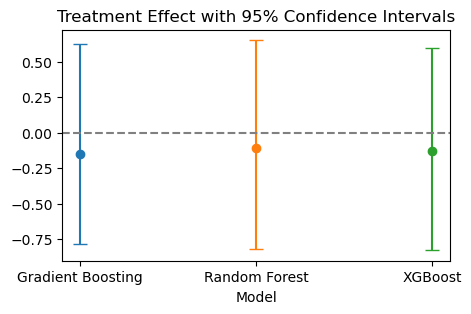

In [86]:
def plot_treatment_effects(results_emp, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_emp.iterrows():
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                           [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')

    # Add suffix _emp to the filename
    filename_with_suffix = filename.replace('.png', '_emp.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_emp_df, 'treatment_effects_plot_emp.png')


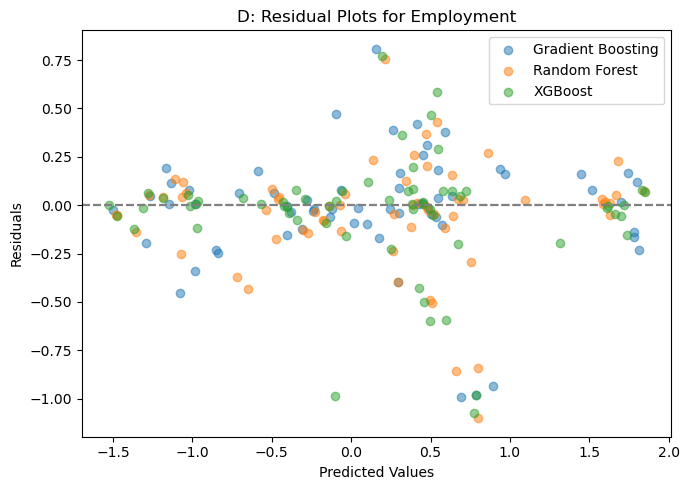

In [87]:
def plot_residuals_emp(y_test_emp, y_star_emp, model_name_emp, ax_emp):
    residuals_emp = y_test_emp - y_star_emp
    ax_emp.scatter(y_star_emp, residuals_emp, alpha=0.5, label=model_name_emp)
    ax_emp.axhline(0, color='gray', linestyle='--')
    ax_emp.set_xlabel('Predicted Values')
    ax_emp.set_ylabel('Residuals')

# Assuming you have three models in the 'models_emp' dictionary
fig_emp, ax_emp = plt.subplots(figsize=(7, 5)) 

for model_name_emp, (outcome_model_emp, treatment_model_emp) in models_emp.items():
    treatment_effect_emp, y_test_emp, y_star_emp, _ = compute_tmle_estimate_emp(df_emp, outcome_model_emp, treatment_model_emp)
    plot_residuals_emp(y_test_emp, y_star_emp, model_name_emp, ax_emp)

ax_emp.set_title('D: Residual Plots for Employment')
ax_emp.legend(title=None) 
plt.tight_layout()
plt.savefig('residual_plots_emp.png')
plt.show()


GDP per capita

In [88]:
# Assuming overall_cwa_gdp_std is already loaded
df_gdp = overall_cwa_gdp_std.copy()

# Define outcome, treatment, and covariates
y_gdp = df_gdp['GDPperCap']
A_gdp = df_gdp['CwACountries']
X_gdp = df_gdp[['ElectAccess', 'Voice and accountability', 'NatRent', 'Pop', 'exports current usd', 'UrbanPopT', 
                'GDSavings', 'imports current usd', 'NetODA', 'ExchangeRate', 'Employment-to-population ratio-15', 
                'Regulatory Quality', 'trade percent of gdp', 'GovtExpd', 'GCapForm', 
                'Inflation consumer prices annual percent', 'Rule of Law', 
                'Government Effectiveness', 'Political Stability and Absence of violence or terrorism', 
                'Control of corruption', 'GDPGrowth', 'FDIInflow', 'CovidDummy']]


In [89]:
def compute_tmle_estimate_gdp(df, outcome_model, treatment_model):
    y_gdp = df['GDPperCap']
    A_gdp = df['CwACountries']
    X_gdp = df[['ElectAccess', 'Voice and accountability', 'NatRent', 'Pop', 'exports current usd', 'UrbanPopT', 
                'GDSavings', 'imports current usd', 'NetODA', 'ExchangeRate', 'Employment-to-population ratio-15', 
                'Regulatory Quality', 'trade percent of gdp', 'GovtExpd', 'GCapForm', 
                'Inflation consumer prices annual percent', 'Rule of Law', 
                'Government Effectiveness', 'Political Stability and Absence of violence or terrorism', 
                'Control of corruption', 'GDPGrowth', 'FDIInflow', 'CovidDummy']]
    P_gdp = df['Propensity Score']

    # Split data for cross-fitting
    X_train_gdp, X_test_gdp, y_train_gdp, y_test_gdp, A_train_gdp, A_test_gdp, P_train_gdp, P_test_gdp = train_test_split(X_gdp, y_gdp, A_gdp, P_gdp, test_size=0.2)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_gdp, A_train_gdp], axis=1), y_train_gdp)
    y_hat_gdp = outcome_model.predict(pd.concat([X_test_gdp, A_test_gdp], axis=1))

    # Initial Treatment Model
    treatment_model.fit(X_train_gdp, A_train_gdp)
    A_hat_gdp = P_test_gdp  # Use propensity scores directly

    # Compute clever covariate
    clever_covariate_gdp = A_test_gdp - A_hat_gdp

    # Update the initial outcome model
    epsilon_model_gdp = OLS(y_test_gdp, add_constant(clever_covariate_gdp)).fit()
    epsilon_gdp = epsilon_model_gdp.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_gdp = y_hat_gdp + epsilon_gdp * clever_covariate_gdp

    # Estimate the treatment effect
    treatment_effect_gdp = np.mean(y_star_gdp[A_test_gdp == 1]) - np.mean(y_star_gdp[A_test_gdp == 0])
    
    # Calculate p-value
    p_value_gdp = epsilon_model_gdp.pvalues.iloc[1]
    
    return treatment_effect_gdp, y_test_gdp, y_star_gdp, p_value_gdp


In [90]:
def bootstrap_tmle_gdp(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_gdp = []
    p_values_gdp = []
    r_squared_values_gdp = []
    rmse_values_gdp = []
    mae_values_gdp = []

    for i in range(n_iterations):
        sample_df_gdp = resample(df)
        treatment_effect_gdp, y_test_sample_gdp, y_star_sample_gdp, p_value_gdp = compute_tmle_estimate_gdp(sample_df_gdp, outcome_model, treatment_model)
        bootstrap_estimates_gdp.append(treatment_effect_gdp)
        p_values_gdp.append(p_value_gdp)
        r_squared_gdp = r2_score(y_test_sample_gdp, y_star_sample_gdp)
        rmse_gdp = np.sqrt(mean_squared_error(y_test_sample_gdp, y_star_sample_gdp))
        mae_gdp = mean_absolute_error(y_test_sample_gdp, y_star_sample_gdp)
        r_squared_values_gdp.append(r_squared_gdp)
        rmse_values_gdp.append(rmse_gdp)
        mae_values_gdp.append(mae_gdp)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_gdp = np.mean(bootstrap_estimates_gdp)
    bootstrap_se_gdp = np.std(bootstrap_estimates_gdp)

    # Calculate the 95% confidence interval
    lower_ci_gdp = np.percentile(bootstrap_estimates_gdp, 2.5)
    upper_ci_gdp = np.percentile(bootstrap_estimates_gdp, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_gdp = np.mean(r_squared_values_gdp)
    mean_rmse_gdp = np.mean(rmse_values_gdp)
    mean_mae_gdp = np.mean(mae_values_gdp)
    
    # Calculate mean p-value
    mean_p_value_gdp = np.mean(p_values_gdp)

    return {
        'Estimated Treatment Effect': bootstrap_mean_gdp,
        'Bootstrap Standard Error': bootstrap_se_gdp,
        '95% Confidence Interval Lower Bound': lower_ci_gdp,
        '95% Confidence Interval Upper Bound': upper_ci_gdp,
        'Mean R-Squared': mean_r_squared_gdp,
        'Mean RMSE': mean_rmse_gdp,
        'Mean MAE': mean_mae_gdp,
        'Mean P-Value': mean_p_value_gdp
    }


In [91]:
models_gdp = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_gdp = []

for model_name_gdp, (outcome_model_gdp, treatment_model_gdp) in models_gdp.items():
    result_gdp = bootstrap_tmle_gdp(df_gdp, outcome_model_gdp, treatment_model_gdp)
    result_gdp['Model'] = model_name_gdp
    results_gdp.append(result_gdp)

results_gdp_df = pd.DataFrame(results_gdp, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_gdp_df)

               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                   -0.234532                  0.312273   
1      Random Forest                   -0.193887                  0.321957   
2            XGBoost                   -0.208472                  0.314825   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                            -0.879884                             0.346739   
1                            -0.841268                             0.397278   
2                            -0.834023                             0.363950   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.944343   0.202756  0.137791      0.373558  
1        0.938018   0.217901  0.149372      0.358102  
2        0.918489   0.239606  0.146889      0.363173  


In [ ]:
Plotting

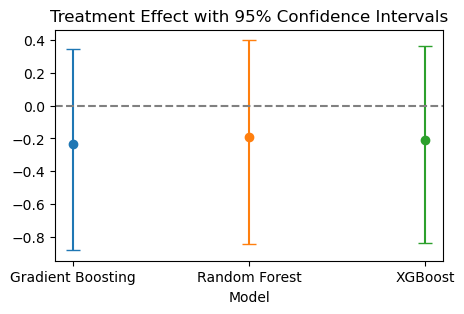

In [92]:
def plot_treatment_effects(results_gdp, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_gdp.iterrows():
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                           [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')

    # Add suffix _gdp to the filename
    filename_with_suffix = filename.replace('.png', '_gdp.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_gdp_df, 'treatment_effects_plot_gdp.png')


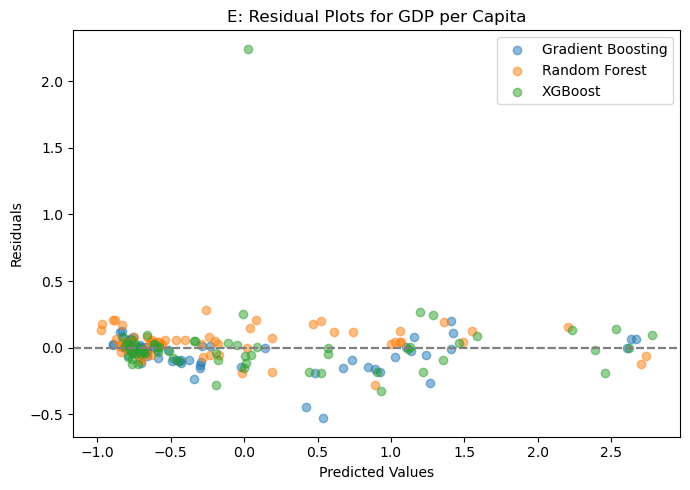

In [93]:
def plot_residuals_gdp(y_test_gdp, y_star_gdp, model_name_gdp, ax_gdp):
    residuals_gdp = y_test_gdp - y_star_gdp
    ax_gdp.scatter(y_star_gdp, residuals_gdp, alpha=0.5, label=model_name_gdp)
    ax_gdp.axhline(0, color='gray', linestyle='--')
    ax_gdp.set_xlabel('Predicted Values')
    ax_gdp.set_ylabel('Residuals')

# Assuming you have three models in the 'models_gdp' dictionary
fig_gdp, ax_gdp = plt.subplots(figsize=(7, 5)) 

for model_name_gdp, (outcome_model_gdp, treatment_model_gdp) in models_gdp.items():
    treatment_effect_gdp, y_test_gdp, y_star_gdp, _ = compute_tmle_estimate_gdp(df_gdp, outcome_model_gdp, treatment_model_gdp)
    plot_residuals_gdp(y_test_gdp, y_star_gdp, model_name_gdp, ax_gdp)

ax_gdp.set_title('E: Residual Plots for GDP per Capita')
ax_gdp.legend(title=None) 
plt.tight_layout()
plt.savefig('residual_plots_gdp.png')
plt.show()


Export

In [ ]:
Final export

In [94]:
# Assuming overall_cwa_expt_std is already loaded
df_expt = overall_cwa_expt_std.copy()

# Define outcome, treatment, and covariates
y_expt = df_expt['exports current usd']
A_expt = df_expt['treat']
X_expt = df_expt[['GDPpConstant', 'FDIInflow', 'trade percent of gdp', 'UrbanPopT', 'GDPperCap', 'GDSavings', 
                'ConsumerPrices', 'ElectAccess', 'NatRent', 'FDIGDP', 'GDPGrowth',  
                'ExchangeRate', 'Voice and accountability', 'Inflation consumer prices annual percent', 
                'Employment-to-population ratio-15', 'Control of corruption', 'Regulatory Quality', 
                'Political Stability and Absence of violence or terrorism', 'GovtExpd', 'Rule of Law', 
                'CovidDummy']]

In [95]:
def compute_tmle_estimate_expt(df, outcome_model, treatment_model):
    y_expt = df['exports current usd']
    A_expt = df['treat']
    X_expt = df[['GDPpConstant', 'FDIInflow', 'trade percent of gdp', 'UrbanPopT', 'GDPperCap', 'GDSavings', 
                'ConsumerPrices', 'ElectAccess', 'NatRent', 'FDIGDP', 'GDPGrowth', 
                'ExchangeRate', 'Voice and accountability', 'Inflation consumer prices annual percent', 
                'Employment-to-population ratio-15', 'Control of corruption', 'Regulatory Quality', 
                'Political Stability and Absence of violence or terrorism', 'GovtExpd', 'Rule of Law', 
                'CovidDummy']]
    P_expt = df['Propensity Score']

    # Split data for cross-fitting
    X_train_expt, X_test_expt, y_train_expt, y_test_expt, A_train_expt, A_test_expt, P_train_expt, P_test_expt = train_test_split(X_expt, y_expt, A_expt, P_expt, test_size=0.2)

    # Initial Outcome Model
    outcome_model.fit(pd.concat([X_train_expt, A_train_expt], axis=1), y_train_expt)
    y_hat_expt = outcome_model.predict(pd.concat([X_test_expt, A_test_expt], axis=1))

    # Initial Treatment Model
    treatment_model.fit(X_train_expt, A_train_expt)
    A_hat_expt = P_test_expt  # Use propensity scores directly

    # Compute clever covariate
    clever_covariate_expt = A_test_expt - A_hat_expt

    # Update the initial outcome model
    epsilon_model_expt = OLS(y_test_expt, add_constant(clever_covariate_expt)).fit()
    epsilon_expt = epsilon_model_expt.params.iloc[1]  # Use iloc to access by position

    # Update the predicted outcome
    y_star_expt = y_hat_expt + epsilon_expt * clever_covariate_expt

    # Estimate the treatment effect
    treatment_effect_expt = np.mean(y_star_expt[A_test_expt == 1]) - np.mean(y_star_expt[A_test_expt == 0])
    
    # Calculate p-value
    p_value_expt = epsilon_model_expt.pvalues.iloc[1]
    
    return treatment_effect_expt, y_test_expt, y_star_expt, p_value_expt


In [96]:
def bootstrap_tmle_expt(df, outcome_model, treatment_model, n_iterations=1000):
    bootstrap_estimates_expt = []
    p_values_expt = []
    r_squared_values_expt = []
    rmse_values_expt = []
    mae_values_expt = []

    for i in range(n_iterations):
        sample_df_expt = resample(df)
        treatment_effect_expt, y_test_sample_expt, y_star_sample_expt, p_value_expt = compute_tmle_estimate_expt(sample_df_expt, outcome_model, treatment_model)
        bootstrap_estimates_expt.append(treatment_effect_expt)
        p_values_expt.append(p_value_expt)
        r_squared_expt = r2_score(y_test_sample_expt, y_star_sample_expt)
        rmse_expt = np.sqrt(mean_squared_error(y_test_sample_expt, y_star_sample_expt))
        mae_expt = mean_absolute_error(y_test_sample_expt, y_star_sample_expt)
        r_squared_values_expt.append(r_squared_expt)
        rmse_values_expt.append(rmse_expt)
        mae_values_expt.append(mae_expt)

    # Calculate the mean and standard error of bootstrap estimates
    bootstrap_mean_expt = np.mean(bootstrap_estimates_expt)
    bootstrap_se_expt = np.std(bootstrap_estimates_expt)

    # Calculate the 95% confidence interval
    lower_ci_expt = np.percentile(bootstrap_estimates_expt, 2.5)
    upper_ci_expt = np.percentile(bootstrap_estimates_expt, 97.5)

    # Calculate the mean R-squared, RMSE, and MAE values
    mean_r_squared_expt = np.mean(r_squared_values_expt)
    mean_rmse_expt = np.mean(rmse_values_expt)
    mean_mae_expt = np.mean(mae_values_expt)
    
    # Calculate mean p-value
    mean_p_value_expt = np.mean(p_values_expt)

    return {
        'Estimated Treatment Effect': bootstrap_mean_expt,
        'Bootstrap Standard Error': bootstrap_se_expt,
        '95% Confidence Interval Lower Bound': lower_ci_expt,
        '95% Confidence Interval Upper Bound': upper_ci_expt,
        'Mean R-Squared': mean_r_squared_expt,
        'Mean RMSE': mean_rmse_expt,
        'Mean MAE': mean_mae_expt,
        'Mean P-Value': mean_p_value_expt
    }


In [97]:
models_expt = {
    'Gradient Boosting': (GradientBoostingRegressor(n_estimators=100, random_state=42), GradientBoostingClassifier(n_estimators=100, random_state=42)),
    'Random Forest': (RandomForestRegressor(n_estimators=100, random_state=42), RandomForestClassifier(n_estimators=100, random_state=42)),
    'XGBoost': (XGBRegressor(n_estimators=100, random_state=42), XGBClassifier(n_estimators=100, random_state=42))
}

results_expt = []

for model_name_expt, (outcome_model_expt, treatment_model_expt) in models_expt.items():
    result_expt = bootstrap_tmle_expt(df_expt, outcome_model_expt, treatment_model_expt)
    result_expt['Model'] = model_name_expt
    results_expt.append(result_expt)

results_expt_df = pd.DataFrame(results_expt, columns=[
    'Model', 'Estimated Treatment Effect', 'Bootstrap Standard Error',
    '95% Confidence Interval Lower Bound', '95% Confidence Interval Upper Bound',
    'Mean R-Squared', 'Mean RMSE', 'Mean MAE', 'Mean P-Value'
])

print(results_expt_df)

               Model  Estimated Treatment Effect  Bootstrap Standard Error  \
0  Gradient Boosting                    0.828644                  0.373136   
1      Random Forest                    0.825329                  0.362682   
2            XGBoost                    0.860472                  0.403071   

   95% Confidence Interval Lower Bound  95% Confidence Interval Upper Bound  \
0                             0.211779                             1.646958   
1                             0.154810                             1.582173   
2                             0.163404                             1.723992   

   Mean R-Squared  Mean RMSE  Mean MAE  Mean P-Value  
0        0.453132   0.706835  0.500237      0.000008  
1        0.455334   0.702495  0.495109      0.000216  
2        0.430988   0.722445  0.505646      0.000004  


In [ ]:
Plotting

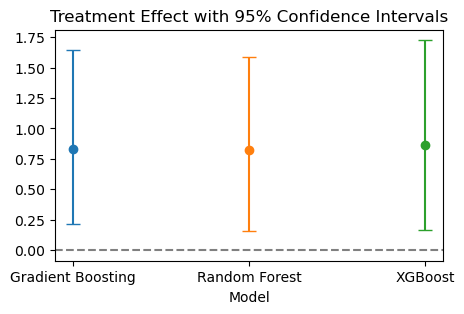

In [98]:
def plot_treatment_effects(results_expt, filename):
    plt.figure(figsize=(5, 3))
    for i, row in results_expt.iterrows():
        plt.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                     yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                           [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                     fmt='o', capsize=5, label=row['Model'])
    plt.axhline(0, color='gray', linestyle='--')
    plt.xlabel('Model')
    plt.title('Treatment Effect with 95% Confidence Intervals')

    # Add suffix _expt to the filename
    filename_with_suffix = filename.replace('.png', '_expt.png')
    plt.savefig(filename_with_suffix)
    plt.show()

# Example usage:
plot_treatment_effects(results_expt_df, 'treatment_effects_plot_expt.png')


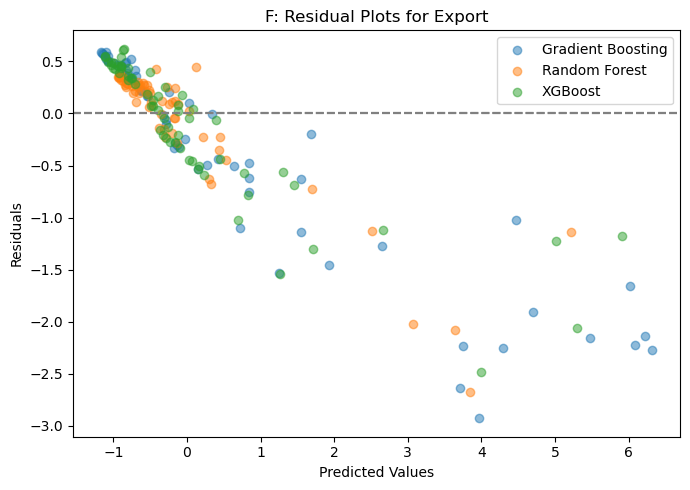

In [99]:
def plot_residuals_expt(y_test_expt, y_star_expt, model_name_expt, ax_expt):
    residuals_expt = y_test_expt - y_star_expt
    ax_expt.scatter(y_star_expt, residuals_expt, alpha=0.5, label=model_name_expt)
    ax_expt.axhline(0, color='gray', linestyle='--')
    ax_expt.set_xlabel('Predicted Values')
    ax_expt.set_ylabel('Residuals')

# Assuming you have three models in the 'models_expt' dictionary
fig_expt, ax_expt = plt.subplots(figsize=(7, 5)) 

for model_name_expt, (outcome_model_expt, treatment_model_expt) in models_expt.items():
    treatment_effect_expt, y_test_expt, y_star_expt, _ = compute_tmle_estimate_expt(df_expt, outcome_model_expt, treatment_model_expt)
    plot_residuals_expt(y_test_expt, y_star_expt, model_name_expt, ax_expt)

ax_expt.set_title('F: Residual Plots for Export')
ax_expt.legend(title=None) 
plt.tight_layout()
plt.savefig('residual_plots_expt.png')
plt.show()


# Figure 3

Overall plot for treament effect

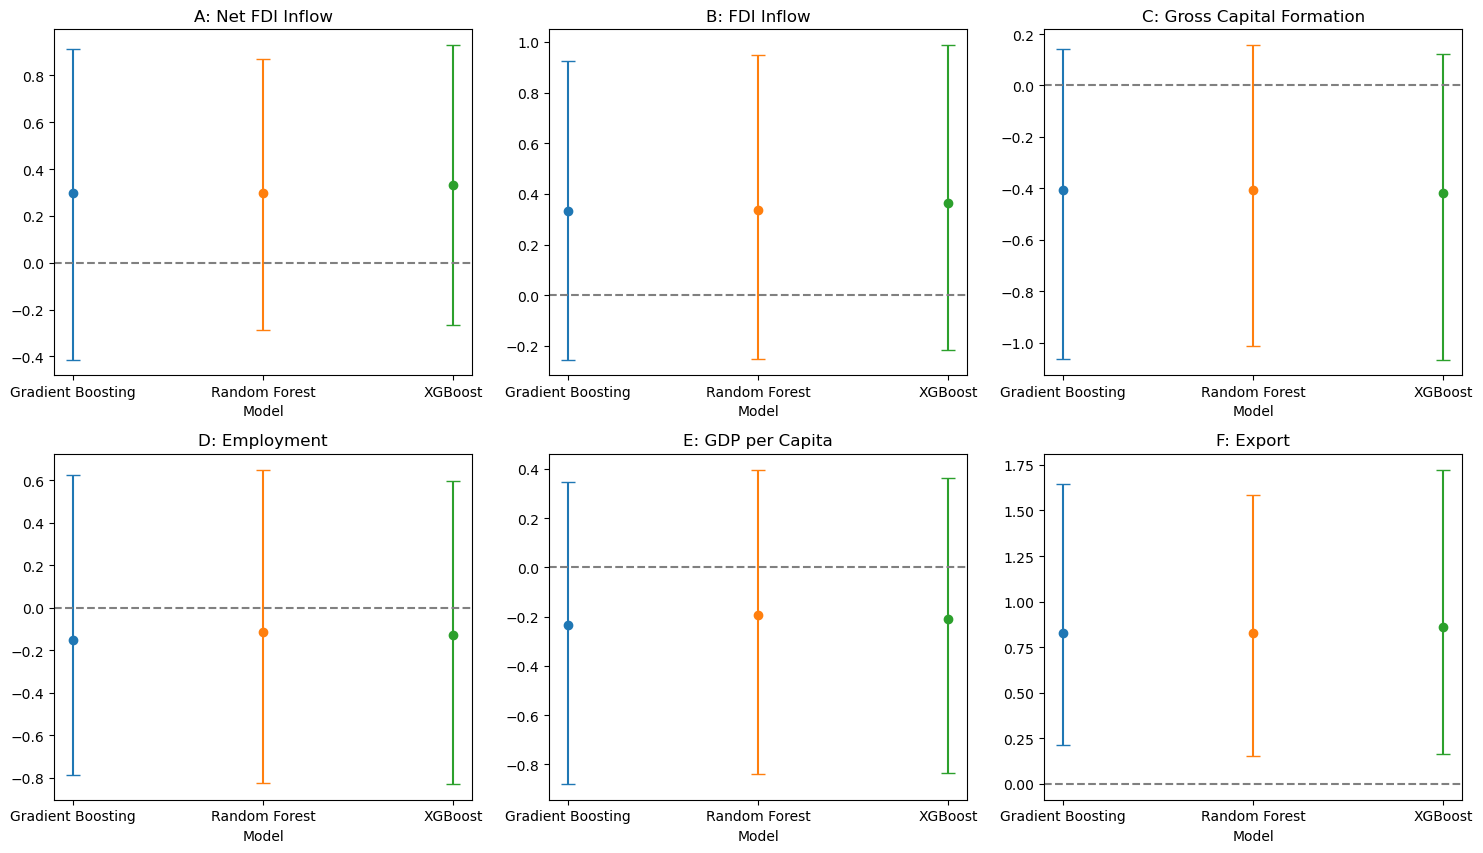

In [100]:
import matplotlib.pyplot as plt

def plot_treatment_effects_subplots(results_dict, filename):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9))
    plot_titles = {
        'fdi': 'A: Net FDI Inflow',
        'nada': 'B: FDI Inflow',
        'gcap': 'C: Gross Capital Formation',
        'emp': 'D: Employment',
        'gdp': 'E: GDP per Capita',
        'expt': 'F: Export'
    }

    for ax, (key, (results, fname)) in zip(axes.flatten(), results_dict.items()):
        for i, row in results.iterrows():
            ax.errorbar(x=row['Model'], y=row['Estimated Treatment Effect'],
                        yerr=[[row['Estimated Treatment Effect'] - row['95% Confidence Interval Lower Bound']],
                              [row['95% Confidence Interval Upper Bound'] - row['Estimated Treatment Effect']]],
                        fmt='o', capsize=5, label=row['Model'])
        ax.axhline(0, color='gray', linestyle='--')
        ax.set_xlabel('Model')
        ax.set_title(plot_titles[key])

    # Add overall title and save the plot as a PNG file
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename)
    plt.show()

# Example usage:
results_dict = {
    'fdi': (results_fdi_df, 'treatment_effects_plot_fdi.png'),
    'nada': (results_nada_df, 'treatment_effects_plot_nada.png'),
    'gcap': (results_gcap_df, 'treatment_effects_plot_gcap.png'),
    'emp': (results_emp_df, 'treatment_effects_plot_emp.png'),
    'gdp': (results_gdp_df, 'treatment_effects_plot_gdp.png'),
    'expt': (results_expt_df, 'treatment_effects_plot_expt.png')
}

plot_treatment_effects_subplots(results_dict, 'combined_treatment_effects_plot.png')


Residual for overall - Figure 4

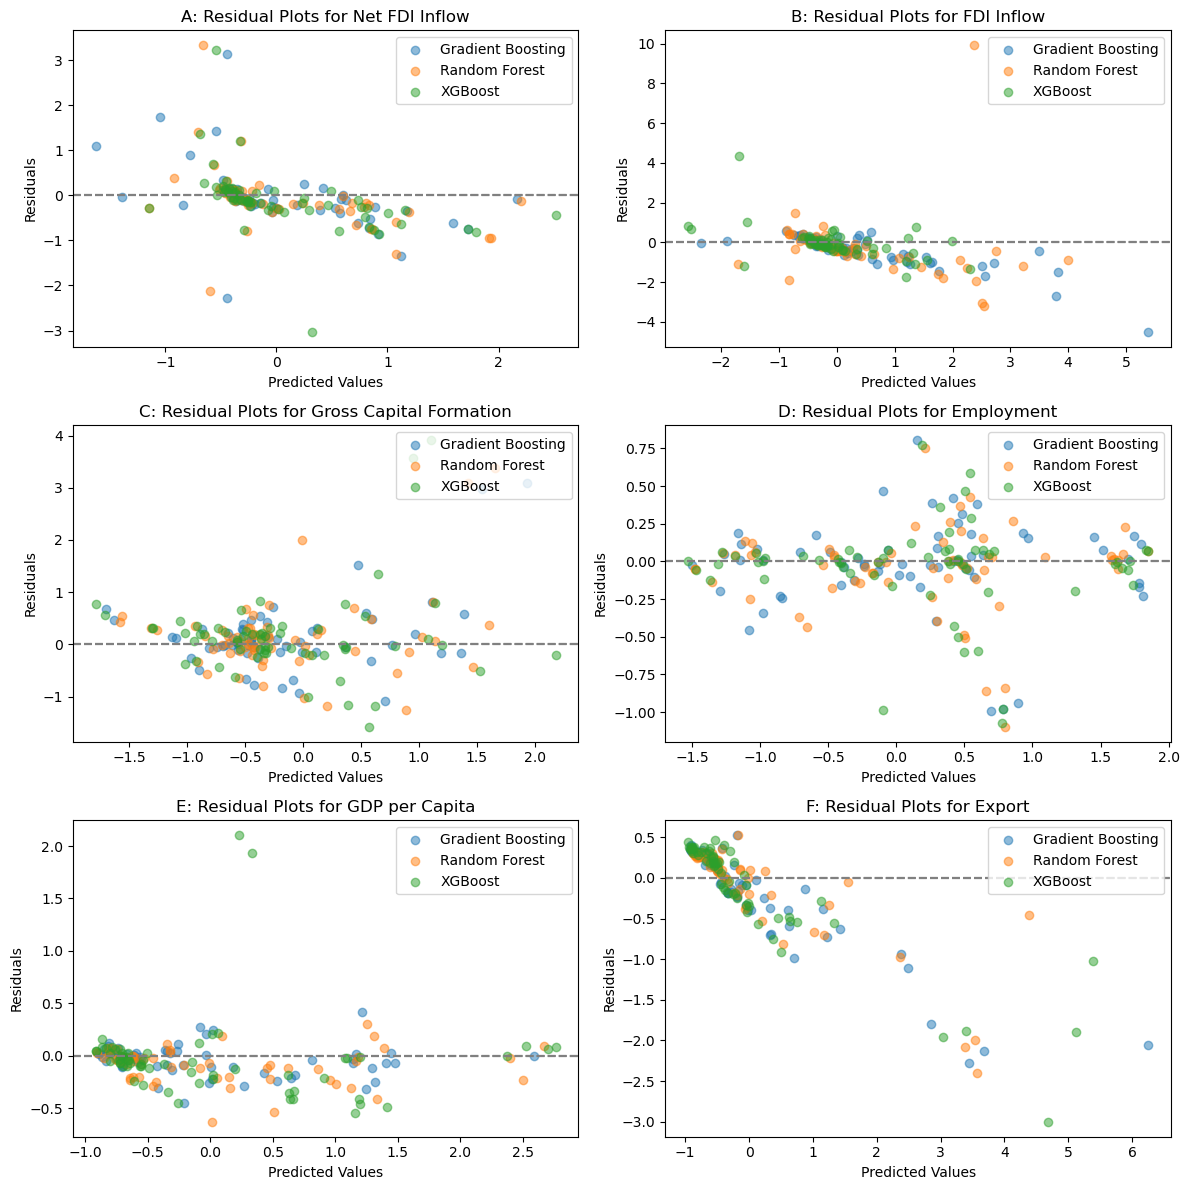

In [101]:
def plot_residuals(y_test, y_star, model_name, ax):
    residuals = y_test - y_star
    ax.scatter(y_star, residuals, alpha=0.5, label=model_name)
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.legend(loc='upper right')

# Assuming you have three models in each dictionary
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Plot for FDI
for model_name_fdi, (outcome_model_fdi, treatment_model_fdi) in models_fdi.items():
    treatment_effect_fdi, y_test_fdi, y_star_fdi, _ = compute_tmle_estimate_fdi(df_fdi, outcome_model_fdi, treatment_model_fdi)
    plot_residuals(y_test_fdi, y_star_fdi, model_name_fdi, axs[0, 0])

axs[0, 0].set_title('A: Residual Plots for Net FDI Inflow')

# Plot for Nada
for model_name_nada, (outcome_model_nada, treatment_model_nada) in models_nada.items():
    treatment_effect_nada, y_test_nada, y_star_nada, _ = compute_tmle_estimate_nada(df_nada, outcome_model_nada, treatment_model_nada)
    plot_residuals(y_test_nada, y_star_nada, model_name_nada, axs[0, 1])

axs[0, 1].set_title('B: Residual Plots for FDI Inflow')

# Plot for GCap
for model_name_gcap, (outcome_model_gcap, treatment_model_gcap) in models_gcap.items():
    treatment_effect_gcap, y_test_gcap, y_star_gcap, _ = compute_tmle_estimate_gcap(df_gcap, outcome_model_gcap, treatment_model_gcap)
    plot_residuals(y_test_gcap, y_star_gcap, model_name_gcap, axs[1, 0])

axs[1, 0].set_title('C: Residual Plots for Gross Capital Formation')

# Plot for Employment
for model_name_emp, (outcome_model_emp, treatment_model_emp) in models_emp.items():
    treatment_effect_emp, y_test_emp, y_star_emp, _ = compute_tmle_estimate_emp(df_emp, outcome_model_emp, treatment_model_emp)
    plot_residuals(y_test_emp, y_star_emp, model_name_emp, axs[1, 1])

axs[1, 1].set_title('D: Residual Plots for Employment')

# Plot for GDP
for model_name_gdp, (outcome_model_gdp, treatment_model_gdp) in models_gdp.items():
    treatment_effect_gdp, y_test_gdp, y_star_gdp, _ = compute_tmle_estimate_gdp(df_gdp, outcome_model_gdp, treatment_model_gdp)
    plot_residuals(y_test_gdp, y_star_gdp, model_name_gdp, axs[2, 0])

axs[2, 0].set_title('E: Residual Plots for GDP per Capita')

# Plot for Export
for model_name_expt, (outcome_model_expt, treatment_model_expt) in models_expt.items():
    treatment_effect_expt, y_test_expt, y_star_expt, _ = compute_tmle_estimate_expt(df_expt, outcome_model_expt, treatment_model_expt)
    plot_residuals(y_test_expt, y_star_expt, model_name_expt, axs[2, 1])

axs[2, 1].set_title('F: Residual Plots for Export')

plt.tight_layout()
plt.savefig('residual_plots_combined.png')
plt.show()


# Export all result to excel - Table 1 and 2

In [102]:
# Save the DataFrames to different sheets in the same Excel file
with pd.ExcelWriter('treatment_effects_result_15.xlsx', engine='xlsxwriter') as writer:
    results_gdp_df.to_excel(writer, sheet_name='GDP', index=False)
    results_emp_df.to_excel(writer, sheet_name='Employment', index=False)
    results_gcap_df.to_excel(writer, sheet_name='Gcap', index=False)
    results_fdi_df.to_excel(writer, sheet_name='FDI', index=False)
    results_nada_df.to_excel(writer, sheet_name='FDINada', index=False)
    results_expt_df.to_excel(writer, sheet_name='Export', index=False)
